## Data Sovereignty and Indigenous Cultures:
### Analysing Mental Health Indicators in Off-Reserve Aboriginal Populations using Python Data Analysis Tools

**Abstract**

Data analysis software and sociology offer statistical, analytical and methodological tools that have the potential to offer new ways to explore the health and well-being of different Canadian populations in way that can create actionable insights for special interest groups and government service providers.  In this study of off-reserve Aboriginal Populations using data from the Statistics Canada Aboriginal Peoples Survey (APS), python data analysis is used to try and answer the question: If the disparity in mental health for Aboriginal women compared to the general population of Canadian women is self-evident, what specific indicators contribute to this inequality, and by how much?  Since data from Reserve populations is protected by a consortium for Aboriginal populations, a dataset from the 2012 was downloaded and analysed in python, using histograms, cross-tables, heatmaps and a calculation of the pearson correlation for each indicator in relation to the respondents' self-rated mental health.

**Procedure**

There's very little publicly available data on Aboriginal populations on reserves. Most of it requires special permissions to access from the First Nations Information Governance Centre. Instead, the dataset I used was drawn from the 2012 Aboriginal People's Survey that's conducated by Statistics Canada in Off-reserve Aboriginal Populations.

Mental health indicators were chosen with reference to a Mental Health Commission of Canada report and a study of community level health data using public data from the Calgary health region.  It was also contingent on what was available in the data set itself, which included a lot of metrics that weren't relevant to the assessment of mental health wellness. I analysed indicators in the following categories:
Alcohol Consumption
Food Security
Chronic Health Conditions
General Health Indicators
Injuries
Community Support
Employment
Traditional Activities
Education
Housing

The entire dataset was stripped down to female participants only, then each indicator was compared to the participant's self-rated mental through histograms, cross-tables, heatmaps and a calculation of the Pearson correlation.  Most of the visualizations proved to be of limited usage, since the data was categorized in subsets that weren't ordinal

**Findings**

A complete table of Pearson correlations is contained in the folder containing documents accompanying this python notebook. The highest correlations are between self-rated general health and mental health with a Pearson number of 0.50. Anxiety disorders had a correlation of -0.322.  Suicidal thoughts also had a correlation of 0.323.  This is followed by food security with an average Pearson number of 0.23.

Other indicators usually associated with mental wellness, such as drug usage and alcoholo consumption showed little to no correlation.

In [256]:
import numpy as np
import pandas as pd
import seaborn as sns

In [257]:
import matplotlib
%matplotlib inline
matplotlib.style.use('ggplot')

In [258]:
df_aps2012 = pd.read_csv("data/aps2012.csv", encoding = "latin1")
print (df_aps2012.shape)

(24803, 327)


In [259]:
## clear all values for '1'(male) in column 'sex' 
df_aps2012f = df_aps2012[df_aps2012.sex != 1]

In [260]:
print (df_aps2012f.shape)

(12814, 327)


### Mental Health Values:
    
1 - Excellent

2 - Very Good

3 - Good

4 - Fair

5 - Poor

In [261]:
df_aps2012f['mh_01g'].value_counts()

6    4087
2    2638
3    2452
1    2292
4     777
9     316
5     208
7      29
8      15
Name: mh_01g, dtype: int64

## Drinking and Mental Health

### Alcohol - Drank in the past 12 months

#### ('alc_01')

1 - Yes

2 - No

In [262]:
df_aps2012_no_nan = df_aps2012f.copy()

## does "greater than include the number in the command or does it start
## from the next number

df_aps2012_no_nan["alc_01"][ df_aps2012_no_nan["alc_01"] >= 6 ] = np.nan

df_aps2012_no_nan["mh_01g"][ df_aps2012_no_nan["mh_01g"] >= 6] = np.nan

C:\Users\Sumaiyya\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Sumaiyya\Anaconda3\lib\site-packages\ipykernel\__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [263]:
df_aps2012_no_nan['alc_01'].value_counts()

1.0    6810
2.0    3454
Name: alc_01, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000028F49DAA198>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000028F5A2B2BA8>]], dtype=object)

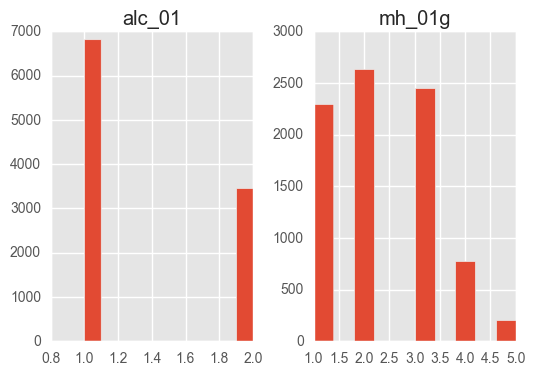

In [264]:
df_aps2012_no_nan[['mh_01g', 'alc_01']].hist()

In [265]:
## generating cross tabs with absolute values
x_tab = pd.crosstab(df_aps2012_no_nan['mh_01g'], df_aps2012_no_nan['alc_01'])

In [266]:
## generating cross tabs with percentages
x_tab = pd.crosstab(df_aps2012_no_nan['mh_01g'], df_aps2012_no_nan['alc_01'], normalize = 'index')

In [267]:
x_tab

alc_01,1.0,2.0
mh_01g,,
1.0,0.745184,0.254816
2.0,0.772210,0.227790
3.0,0.743967,0.256033
4.0,0.728682,0.271318
5.0,0.658654,0.341346


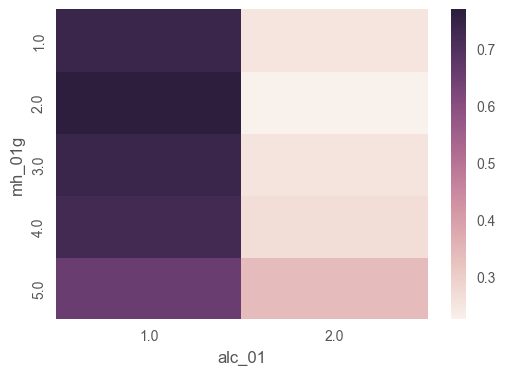

In [268]:
sns.heatmap(x_tab)

In [269]:
df_new = df_aps2012f
df_new = df_new[ df_new["alc_01"] < 6 ]
df_new = df_new[ df_new["mh_01g"] < 6 ]

from scipy.stats.stats import pearsonr

print(pearsonr(df_new['mh_01g'], df_new['alc_01']))

(0.024705405411589752, 0.024016252506081002)


### Alcohol - Drank in the past 12 months - Frequency

#### ('alc_02g')

1 - Less than once a month

2 - 1 to 3 times a month

3 - Once a week

4 - 2 to 3 times a week

5 - 4 to 6 times a week

In [270]:
df_aps2012_no_nan["alc_02g"][ df_aps2012_no_nan["alc_02g"] >= 6 ] = np.nan

C:\Users\Sumaiyya\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [271]:
df_aps2012_no_nan['alc_02g'].value_counts()

1.0    2421
2.0    2330
3.0     958
4.0     749
5.0     312
Name: alc_02g, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000028F53778550>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000028F518365C0>]], dtype=object)

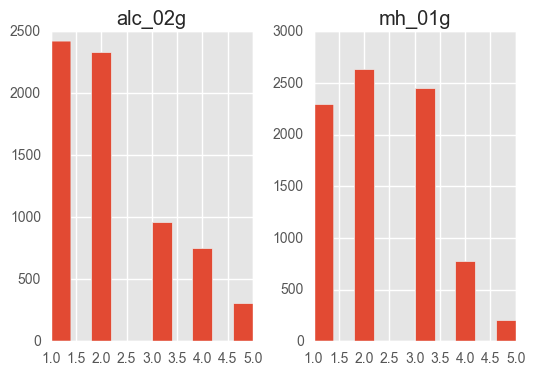

In [272]:
df_aps2012_no_nan[['mh_01g', 'alc_02g']].hist()

In [273]:
## generating cross tabs with absolute values
x_tab = pd.crosstab(df_aps2012_no_nan['mh_01g'], df_aps2012_no_nan['alc_02g'])

In [274]:
## generating cross tabs with percentages
x_tab = pd.crosstab(df_aps2012_no_nan['mh_01g'], df_aps2012_no_nan['alc_02g'], normalize = 'index')

In [275]:
x_tab

alc_02g,1.0,2.0,3.0,4.0,5.0
mh_01g,,,,,
1.0,0.331765,0.350588,0.153529,0.119412,0.044706
2.0,0.342688,0.346135,0.158050,0.110783,0.042344
3.0,0.324146,0.363286,0.138368,0.124587,0.049614
4.0,0.390764,0.341030,0.094139,0.108348,0.065719
5.0,0.459854,0.248175,0.080292,0.109489,0.102190


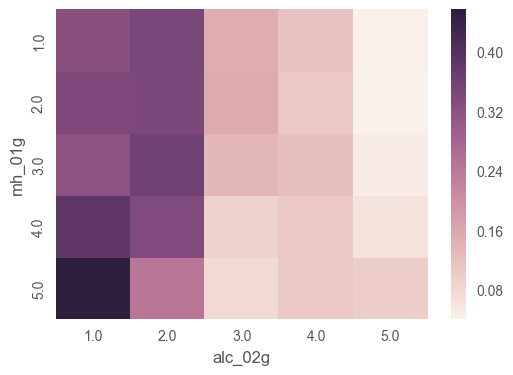

In [276]:
sns.heatmap(x_tab)

In [277]:
df_new = df_aps2012f
df_new = df_new[ df_new["alc_02g"] < 6 ]
df_new = df_new[ df_new["mh_01g"] < 6 ]

from scipy.stats.stats import pearsonr

print(pearsonr(df_new['mh_01g'], df_new['alc_02g']))

(-0.0072517867141435044, 0.56666668165548373)


### Alcohol - Drank in the past 12 months - Five or more drinks on one occasion

#### ('alc_03g')

1 - Never

2 - Less than once a month

3 - 1 to 3 times a month

4 - Once a week or more

In [278]:
df_aps2012_no_nan["alc_03g"][ df_aps2012_no_nan["alc_03g"] >= 6 ] = np.nan

C:\Users\Sumaiyya\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [279]:
df_aps2012_no_nan['alc_03g'].value_counts()

1.0    2529
2.0    2249
3.0    1394
4.0     515
Name: alc_03g, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000028F518E69E8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000028F519EA7B8>]], dtype=object)

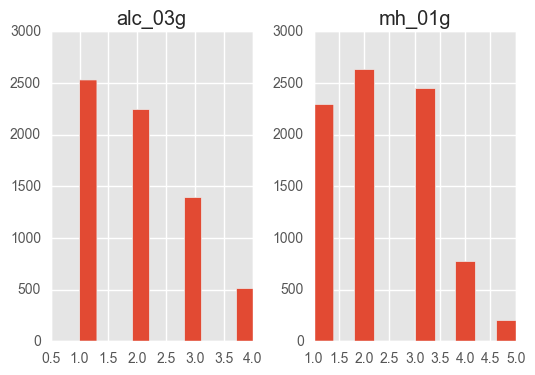

In [280]:
df_aps2012_no_nan[['mh_01g', 'alc_03g']].hist()

In [281]:
## generating cross tabs with absolute values
x_tab = pd.crosstab(df_aps2012_no_nan['mh_01g'], df_aps2012_no_nan['alc_03g'])

In [282]:
## generating cross tabs with percentages
x_tab = pd.crosstab(df_aps2012_no_nan['mh_01g'], df_aps2012_no_nan['alc_03g'], normalize = 'index')

In [283]:
x_tab

alc_03g,1.0,2.0,3.0,4.0
mh_01g,,,,
1.0,0.417999,0.347543,0.178804,0.055654
2.0,0.374752,0.352475,0.204950,0.067822
3.0,0.329255,0.324805,0.247497,0.098443
4.0,0.324955,0.326750,0.251346,0.096948
5.0,0.308271,0.338346,0.187970,0.165414


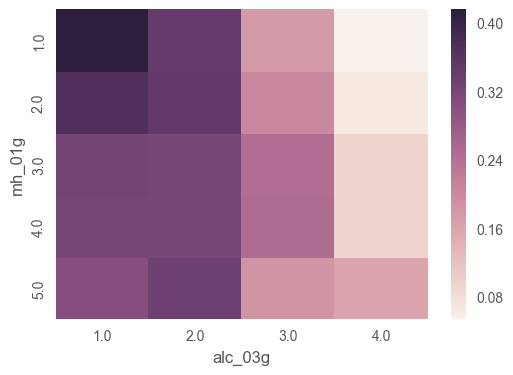

In [284]:
sns.heatmap(x_tab)

In [285]:
df_new = df_aps2012f
df_new = df_new[ df_new["alc_03g"] < 6 ]
df_new = df_new[ df_new["mh_01g"] < 6 ]

from scipy.stats.stats import pearsonr

print(pearsonr(df_new['mh_01g'], df_new['alc_03g']))

(0.10618952186649019, 5.2316114951424936e-17)


## Food Security and Mental Health

### Food Security - Food didn't last

#### ('fs_01')

1 - Often True
2 - Sometimes True
3 - Never True

In [286]:
df_aps2012_no_nan["fs_01"][ df_aps2012_no_nan["fs_01"] >= 6 ] = np.nan

C:\Users\Sumaiyya\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [287]:
df_aps2012_no_nan['fs_01'].value_counts()

3.0    9497
2.0    2221
1.0     632
Name: fs_01, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000028F519BE4E0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000028F51BA2160>]], dtype=object)

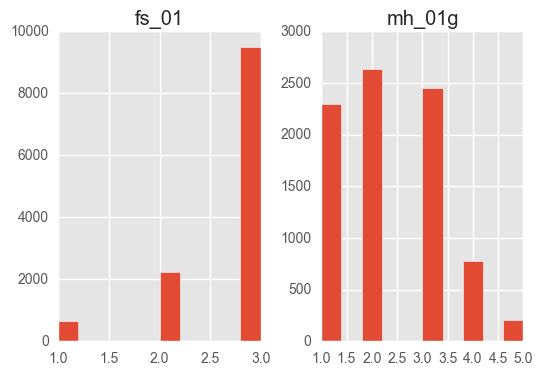

In [288]:
df_aps2012_no_nan[['mh_01g', 'fs_01']].hist()

In [289]:
## generating cross tabs with absolute values
x_tab = pd.crosstab(df_aps2012_no_nan['mh_01g'], df_aps2012_no_nan['fs_01'])

In [290]:
## generating cross tabs with percentages
x_tab = pd.crosstab(df_aps2012_no_nan['mh_01g'], df_aps2012_no_nan['fs_01'], normalize = 'index')

In [291]:
x_tab

fs_01,1.0,2.0,3.0
mh_01g,,,
1.0,0.021529,0.114675,0.863796
2.0,0.038931,0.152290,0.808779
3.0,0.067216,0.253196,0.679588
4.0,0.125490,0.270588,0.603922
5.0,0.234146,0.273171,0.492683


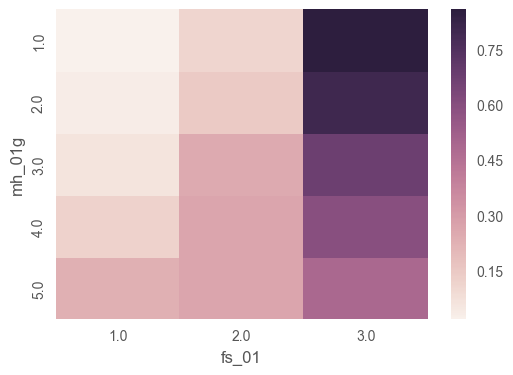

In [292]:
## generating heatmap. make sure to install seaborn to do this
sns.heatmap(x_tab)

In [293]:
## Pearson Correlation
## this code is wrong
##df_new = df_aps2012f
##df_new["fs_01"][ df_new["fs_01"] >= 6 ] = np.nan
##df_new["mh_01g"][ df_new["mh_01g"] >= 6 ] = np.nan
##
##correct way by Prof.Hanna below

df_new = df_aps2012f
df_new = df_new[ df_new["fs_01"] < 6 ]
df_new = df_new[ df_new["mh_01g"] < 6 ]

In [294]:
from scipy.stats.stats import pearsonr

print(pearsonr(df_new['mh_01g'], df_new['fs_01']))

(-0.23744915995608729, 1.2851548889852822e-106)


### Food Security - Balanced Meals Unaffordable

#### ('fs_02')

1 - Often True

2 - Sometimes True

3 - Never True

In [295]:
df_aps2012_no_nan["fs_02"][ df_aps2012_no_nan["fs_02"] >= 6 ] = np.nan

C:\Users\Sumaiyya\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [296]:
df_aps2012_no_nan['fs_02'].value_counts()

3.0    9737
2.0    1936
1.0     663
Name: fs_02, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000028F51CCA6D8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000028F531BA128>]], dtype=object)

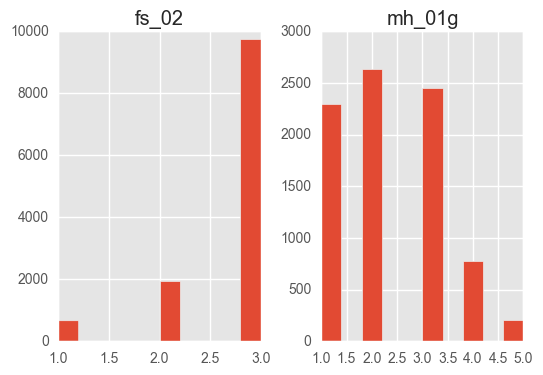

In [297]:
df_aps2012_no_nan[['mh_01g', 'fs_02']].hist()

In [298]:
## generating cross tabs with absolute values
x_tab = pd.crosstab(df_aps2012_no_nan['mh_01g'], df_aps2012_no_nan['fs_02'])

In [299]:
## generating cross tabs with percentages
x_tab = pd.crosstab(df_aps2012_no_nan['mh_01g'], df_aps2012_no_nan['fs_02'], normalize = 'all')

In [300]:
x_tab

fs_02,1.0,2.0,3.0
mh_01g,,,
1.0,0.007247,0.021621,0.246044
2.0,0.014132,0.040826,0.261384
3.0,0.019930,0.067279,0.204614
4.0,0.012441,0.022708,0.057133
5.0,0.005435,0.006885,0.012320


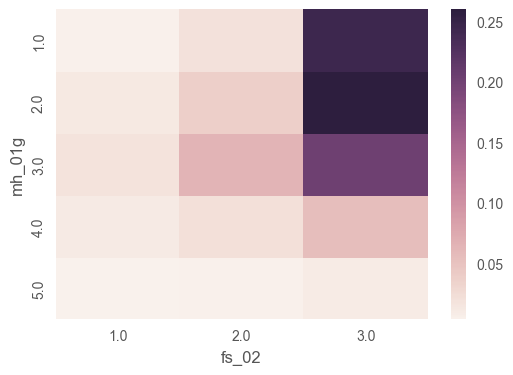

In [301]:
sns.heatmap(x_tab)

In [302]:
df_new = df_aps2012f
df_new = df_new[ df_new["fs_02"] < 6 ]
df_new = df_new[ df_new["mh_01g"] < 6 ]

from scipy.stats.stats import pearsonr

print(pearsonr(df_new['mh_01g'], df_new['fs_02']))

(-0.24344032888651732, 5.6708799610099968e-112)


### Food Security - Meals skipped/cut meal size

#### ('fs_03')

1 - Yes

2 - No

In [303]:
df_aps2012_no_nan["fs_03"][ df_aps2012_no_nan["fs_03"] >= 6 ] = np.nan

C:\Users\Sumaiyya\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [304]:
df_aps2012_no_nan['fs_03'].value_counts()

2.0    10677
1.0     1670
Name: fs_03, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000028F531C83C8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000028F532A0160>]], dtype=object)

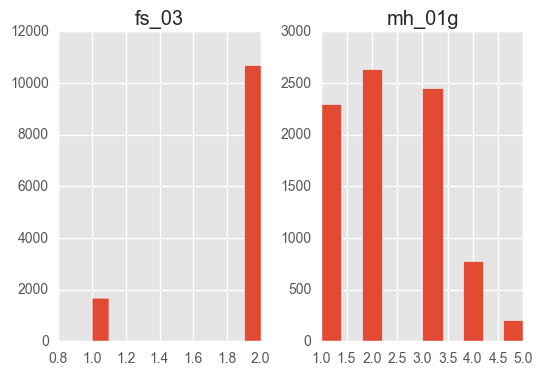

In [305]:
df_aps2012_no_nan[['mh_01g', 'fs_03']].hist()

In [306]:
## generating cross tabs with absolute values
x_tab = pd.crosstab(df_aps2012_no_nan['mh_01g'], df_aps2012_no_nan['fs_03'])

In [307]:
## generating cross tabs with percentages
x_tab = pd.crosstab(df_aps2012_no_nan['mh_01g'], df_aps2012_no_nan['fs_03'], normalize = 'all')

In [308]:
x_tab

fs_03,1.0,2.0
mh_01g,,
1.0,0.017864,0.256608
2.0,0.029813,0.286421
3.0,0.056608,0.235607
4.0,0.027520,0.064816
5.0,0.010018,0.014725


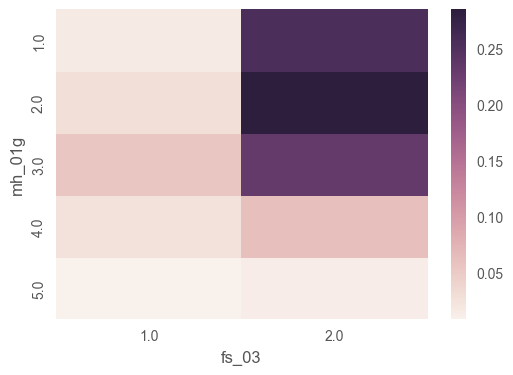

In [309]:
sns.heatmap(x_tab)

In [310]:
df_new = df_aps2012f
df_new = df_new[ df_new["fs_03"] < 6 ]
df_new = df_new[ df_new["mh_01g"] < 6 ]

from scipy.stats.stats import pearsonr

print(pearsonr(df_new['mh_01g'], df_new['fs_03']))

(-0.23311881690439928, 1.1819395688252211e-102)


### Food Security - Ate less than you felt you should

#### ('fs_05')

1 - Yes

2 - No

In [311]:
df_aps2012_no_nan["fs_05"][ df_aps2012_no_nan["fs_05"] >= 6 ] = np.nan

C:\Users\Sumaiyya\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [312]:
df_aps2012_no_nan['fs_05'].value_counts()

2.0    10519
1.0     1826
Name: fs_05, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000028F53473320>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000028F5351E438>]], dtype=object)

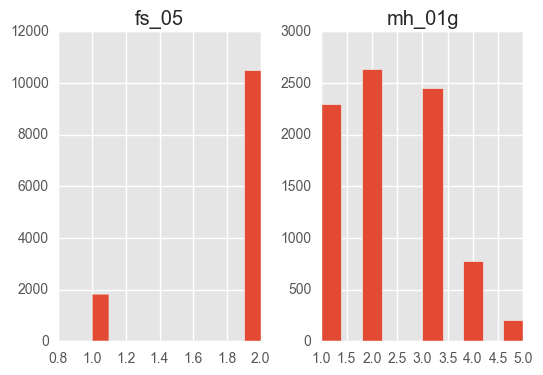

In [313]:
df_aps2012_no_nan[['mh_01g', 'fs_05']].hist()

In [314]:
## generating cross tabs with absolute values
x_tab = pd.crosstab(df_aps2012_no_nan['mh_01g'], df_aps2012_no_nan['fs_05'])

In [315]:
## generating cross tabs with percentages
x_tab = pd.crosstab(df_aps2012_no_nan['mh_01g'], df_aps2012_no_nan['fs_05'], normalize = 'all')

In [316]:
x_tab

fs_05,1.0,2.0
mh_01g,,
1.0,0.020275,0.254164
2.0,0.034757,0.281559
3.0,0.059377,0.232802
4.0,0.028120,0.064205
5.0,0.011224,0.013517


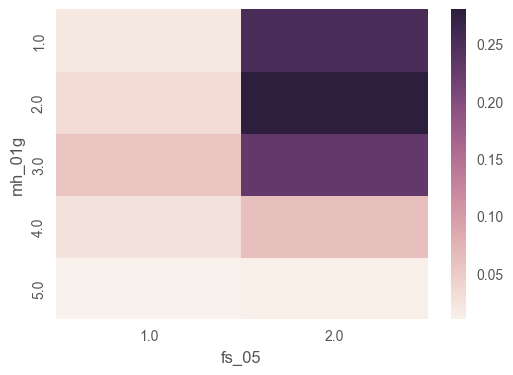

In [317]:
sns.heatmap(x_tab)

In [318]:
df_new = df_aps2012f
df_new = df_new[ df_new["fs_05"] < 6 ]
df_new = df_new[ df_new["mh_01g"] < 6 ]

from scipy.stats.stats import pearsonr

print(pearsonr(df_new['mh_01g'], df_new['fs_05']))

(-0.23048489991654611, 2.4358053449917402e-100)


### Food Security - Hungry but could not afford food

#### ('fs_06')

1 - Yes

2 - No

In [319]:
df_aps2012_no_nan["fs_06"][ df_aps2012_no_nan["fs_06"] >= 6 ] = np.nan

C:\Users\Sumaiyya\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [320]:
df_aps2012_no_nan['fs_06'].value_counts()

2.0    11045
1.0     1294
Name: fs_06, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000028F534F2C50>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000028F536CD7F0>]], dtype=object)

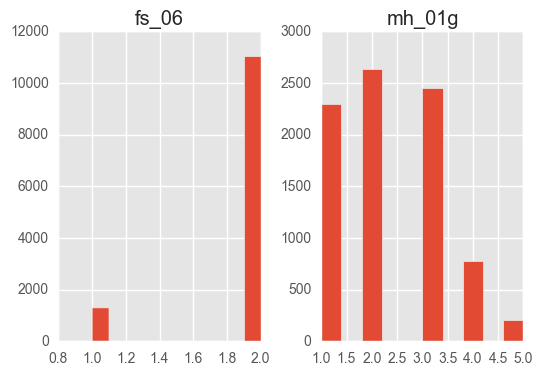

In [321]:
df_aps2012_no_nan[['mh_01g', 'fs_06']].hist()

In [322]:
## generating cross tabs with absolute values
x_tab = pd.crosstab(df_aps2012_no_nan['mh_01g'], df_aps2012_no_nan['fs_06'])

In [323]:
## generating cross tabs with percentages
x_tab = pd.crosstab(df_aps2012_no_nan['mh_01g'], df_aps2012_no_nan['fs_06'], normalize = 'all')

In [324]:
x_tab

fs_06,1.0,2.0
mh_01g,,
1.0,0.012556,0.261982
2.0,0.022697,0.293734
3.0,0.043825,0.248099
4.0,0.022093,0.070385
5.0,0.009538,0.015091


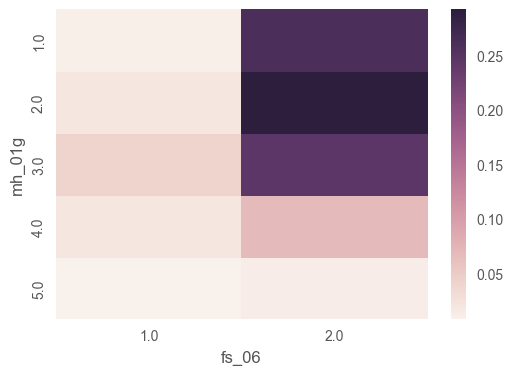

In [325]:
sns.heatmap(x_tab)

In [326]:
df_new = df_aps2012f
df_new = df_new[ df_new["fs_06"] < 6 ]
df_new = df_new[ df_new["mh_01g"] < 6 ]

from scipy.stats.stats import pearsonr

print(pearsonr(df_new['mh_01g'], df_new['fs_06']))

(-0.22518622355411183, 1.0274106604064509e-95)


## Chronic Conditions and Mental Health

### High Blood Pressure

#### ('cc2_03a')

1 - Yes

2 - No

In [327]:
df_aps2012_no_nan["cc2_03a"][ df_aps2012_no_nan["cc2_03a"] >= 6 ] = np.nan

C:\Users\Sumaiyya\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [328]:
df_aps2012_no_nan['cc2_03a'].value_counts()

2.0    9061
1.0    1215
Name: cc2_03a, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000028F5399E9E8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000028F53A09BA8>]], dtype=object)

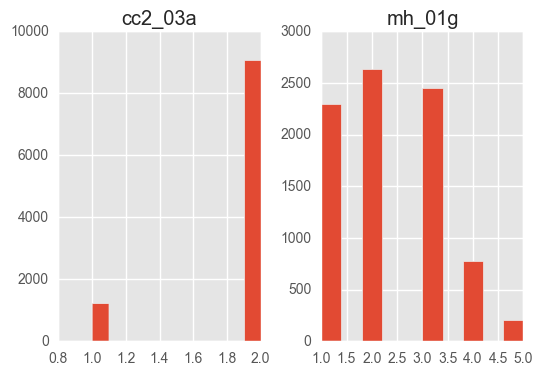

In [329]:
df_aps2012_no_nan[['mh_01g', 'cc2_03a']].hist()

In [330]:
## generating cross tabs with absolute values
x_tab = pd.crosstab(df_aps2012_no_nan['mh_01g'], df_aps2012_no_nan['cc2_03a'])

In [331]:
## generating cross tabs with percentages
x_tab = pd.crosstab(df_aps2012_no_nan['mh_01g'], df_aps2012_no_nan['cc2_03a'], normalize = 'all')

In [332]:
x_tab

cc2_03a,1.0,2.0
mh_01g,,
1.0,0.030485,0.244359
2.0,0.039846,0.275444
3.0,0.043567,0.249520
4.0,0.017163,0.075612
5.0,0.006001,0.018003


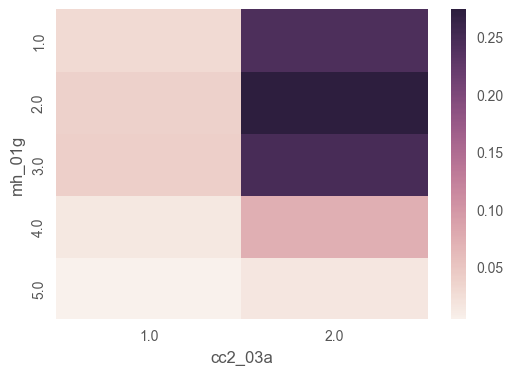

In [333]:
sns.heatmap(x_tab)

In [334]:
df_aps2012_no_nan = df_aps2012_no_nan[ df_aps2012_no_nan["cc2_03a"] < 6]

In [335]:
df_new = df_aps2012f
df_new = df_new[ df_new["cc2_03a"] < 6 ]
df_new = df_new[ df_new["mh_01g"] < 6 ]

from scipy.stats.stats import pearsonr

print(pearsonr(df_new['mh_01g'], df_new['cc2_03a']))

(-0.077282304976089247, 1.6198660499577102e-12)


### Mood Disorder

#### ('cc2_09')

1 - Yes

2 - No

In [336]:
df_aps2012_no_nan["cc2_09"][ df_aps2012_no_nan["cc2_09"] >= 6 ] = np.nan

In [337]:
df_aps2012_no_nan['cc2_09'].value_counts()

2.0    8881
1.0    1360
Name: cc2_09, dtype: int64

In [338]:
## generating cross tabs with absolute values
x_tab = pd.crosstab(df_aps2012_no_nan['mh_01g'], df_aps2012_no_nan['cc2_09'])

In [339]:
## generating cross tabs with percentages
x_tab = pd.crosstab(df_aps2012_no_nan['mh_01g'], df_aps2012_no_nan['cc2_09'], normalize = 'all')

In [340]:
x_tab

cc2_09,1.0,2.0
mh_01g,,
1.0,0.004449,0.270771
2.0,0.023446,0.292293
3.0,0.055669,0.237225
4.0,0.045930,0.046291
5.0,0.017795,0.006132


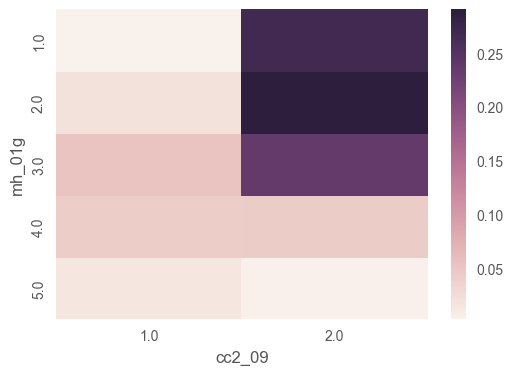

In [341]:
sns.heatmap(x_tab)

In [342]:
df_new = df_aps2012f
df_new = df_new[ df_new["cc2_09"] < 6 ]
df_new = df_new[ df_new["mh_01g"] < 6 ]

from scipy.stats.stats import pearsonr

print(pearsonr(df_new['mh_01g'], df_new['cc2_09']))

(-0.42671100785290911, 0.0)


### Anxiety Disorder

#### ('cc2_10')

1 - Yes

2 - No

In [343]:
df_aps2012_no_nan["cc2_10"][ df_aps2012_no_nan["cc2_10"] >= 6 ] = np.nan

In [344]:
df_aps2012_no_nan['cc2_10'].value_counts()

2.0    8858
1.0    1390
Name: cc2_10, dtype: int64

In [345]:
## generating cross tabs with absolute values
x_tab = pd.crosstab(df_aps2012_no_nan['mh_01g'], df_aps2012_no_nan['cc2_10'])

In [346]:
## generating cross tabs with percentages
x_tab = pd.crosstab(df_aps2012_no_nan['mh_01g'], df_aps2012_no_nan['cc2_10'], normalize = 'all')

In [347]:
x_tab

cc2_10,1.0,2.0
mh_01g,,
1.0,0.010453,0.264688
2.0,0.031839,0.283552
3.0,0.055028,0.237895
4.0,0.037366,0.055269
5.0,0.013337,0.010573


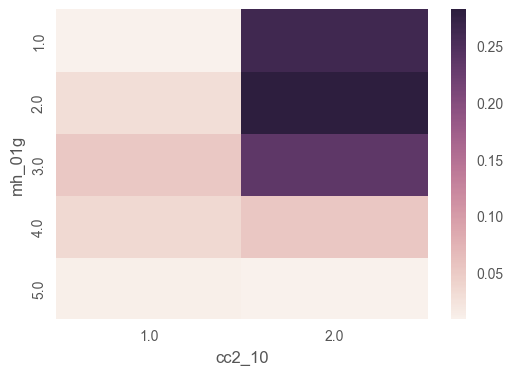

In [348]:
sns.heatmap(x_tab)

In [349]:
df_new = df_aps2012f
df_new = df_new[ df_new["cc2_10"] < 6 ]
df_new = df_new[ df_new["mh_01g"] < 6 ]

from scipy.stats.stats import pearsonr

print(pearsonr(df_new['mh_01g'], df_new['cc2_10']))

(-0.32211981676987489, 5.0878068210438596e-201)


## General Health Indicators and Mental Health

### Health Status - Self-perceived

#### ('gh1_01')

1 - Excellent

2 - Very good

3 - Good

4 - Fair

5 - Poor

In [350]:
df_aps2012_no_nan["gh1_01"][ df_aps2012_no_nan["gh1_01"] >= 6 ] = np.nan

In [351]:
df_aps2012_no_nan['gh1_01'].value_counts()

2.0    3077
3.0    2972
1.0    2421
4.0    1213
5.0     585
Name: gh1_01, dtype: int64

In [352]:
## generating cross tabs with absolute values
x_tab = pd.crosstab(df_aps2012_no_nan['mh_01g'], df_aps2012_no_nan['gh1_01'])

In [353]:
## generating cross tabs with percentages
x_tab = pd.crosstab(df_aps2012_no_nan['mh_01g'], df_aps2012_no_nan['gh1_01'], normalize = 'all')

In [354]:
x_tab

gh1_01,1.0,2.0,3.0,4.0,5.0
mh_01g,,,,,
1.0,0.118516,0.088377,0.047190,0.015490,0.005283
2.0,0.044909,0.144813,0.087536,0.027378,0.010687
3.0,0.022454,0.062200,0.143492,0.045029,0.019813
4.0,0.002882,0.009126,0.030980,0.035663,0.014169
5.0,0.000600,0.001201,0.003602,0.005644,0.012968


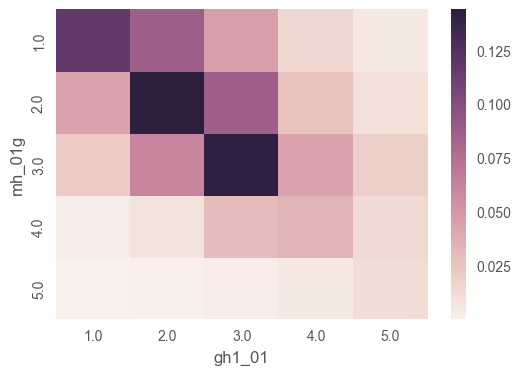

In [355]:
sns.heatmap(x_tab)

In [356]:
df_new = df_aps2012f
df_new = df_new[ df_new["gh1_01"] < 6 ]
df_new = df_new[ df_new["mh_01g"] < 6 ]

from scipy.stats.stats import pearsonr

print(pearsonr(df_new['mh_01g'], df_new['gh1_01']))

(0.50015831001241817, 0.0)


### Regular Medical Doctor

#### ('gh2_01')

1 - Yes

2 - No

In [357]:
df_aps2012_no_nan["gh2_01"][ df_aps2012_no_nan["gh2_01"] >= 6 ] = np.nan

In [358]:
df_aps2012_no_nan['gh2_01'].value_counts()

1.0    7799
2.0    2458
Name: gh2_01, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000028F51DE74E0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000028F51F13F60>]], dtype=object)

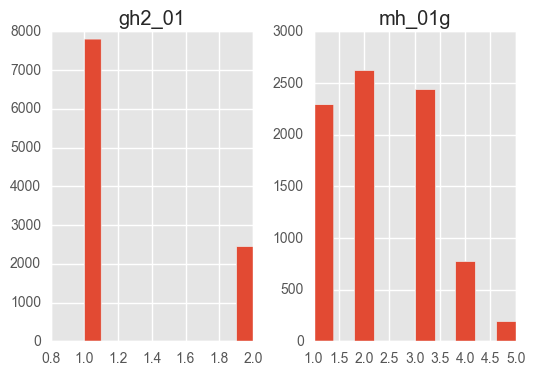

In [359]:
df_aps2012_no_nan[['mh_01g', 'gh2_01']].hist()

In [360]:
## generating cross tabs with absolute values
x_tab = pd.crosstab(df_aps2012_no_nan['mh_01g'], df_aps2012_no_nan['gh2_01'])

In [361]:
## generating cross tabs with percentages
x_tab = pd.crosstab(df_aps2012_no_nan['mh_01g'], df_aps2012_no_nan['gh2_01'], normalize = 'index')

In [362]:
x_tab

gh2_01,1.0,2.0
mh_01g,,
1.0,0.780690,0.219310
2.0,0.765042,0.234958
3.0,0.716687,0.283313
4.0,0.755181,0.244819
5.0,0.790000,0.210000


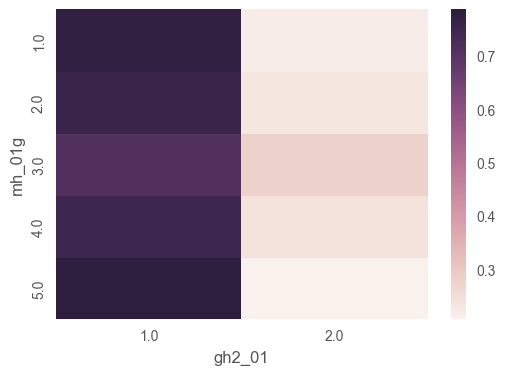

In [363]:

sns.heatmap(x_tab)

In [364]:
df_new = df_aps2012f
df_new = df_new[ df_new["gh2_01"] < 6 ]
df_new = df_new[ df_new["mh_01g"] < 6 ]

from scipy.stats.stats import pearsonr

print(pearsonr(df_new['mh_01g'], df_new['gh2_01']))

(0.036666806652097914, 0.00079829801322403549)


### Dental Professional - Last time visited

#### ('gh2_04g')

1 - Less than a year ago

2 - 1 year to less than 2 years ago

3 - 2 years to lesss than 3 years ago

4 - 3 years to less than 5 years ago

5 - 5 or more years ago to never

In [365]:
df_aps2012_no_nan["gh2_04g"][ df_aps2012_no_nan["gh2_04g"] >= 6 ] = np.nan

In [366]:
df_aps2012_no_nan['gh2_04g'].value_counts()

1.0    6936
2.0    1377
5.0     768
3.0     604
4.0     467
Name: gh2_04g, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000028F52024630>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000028F520CB550>]], dtype=object)

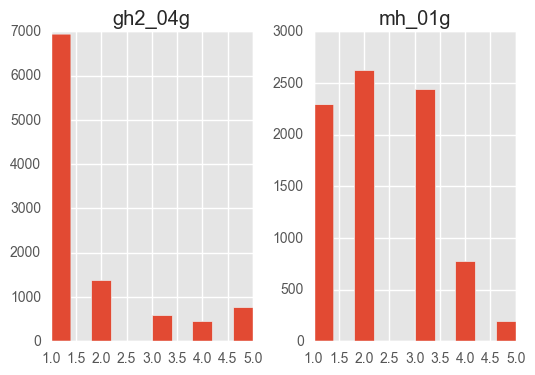

In [367]:
df_aps2012_no_nan[['mh_01g', 'gh2_04g']].hist()

In [368]:
## generating cross tabs with absolute values
x_tab = pd.crosstab(df_aps2012_no_nan['mh_01g'], df_aps2012_no_nan['gh2_04g'])

In [369]:
## generating cross tabs with percentages
x_tab = pd.crosstab(df_aps2012_no_nan['mh_01g'], df_aps2012_no_nan['gh2_04g'], normalize = 'index')

In [370]:
x_tab

gh2_04g,1.0,2.0,3.0,4.0,5.0
mh_01g,,,,,
1.0,0.690382,0.143171,0.054018,0.043478,0.068950
2.0,0.667305,0.134918,0.068225,0.047528,0.082024
3.0,0.625104,0.151616,0.073322,0.053024,0.096935
4.0,0.609375,0.148438,0.062500,0.070312,0.109375
5.0,0.570707,0.106061,0.065657,0.121212,0.136364


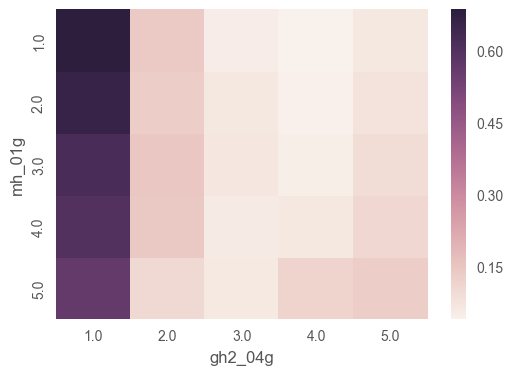

In [371]:

sns.heatmap(x_tab)

In [372]:
df_new = df_aps2012f
df_new = df_new[ df_new["gh2_04g"] < 6 ]
df_new = df_new[ df_new["mh_01g"] < 6 ]

from scipy.stats.stats import pearsonr

print(pearsonr(df_new['mh_01g'], df_new['gh2_04g']))

(0.07972489528526, 3.4959248758241504e-13)


### Health Care needed but not received - 12 months

#### ('gh2_06')

1 - Yes

2 - No

In [373]:
df_aps2012_no_nan["gh2_06"][ df_aps2012_no_nan["gh2_06"] >= 6 ] = np.nan

In [374]:
df_aps2012_no_nan['gh2_06'].value_counts()

2.0    8821
1.0    1408
Name: gh2_06, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000028F5208F8D0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000028F52286278>]], dtype=object)

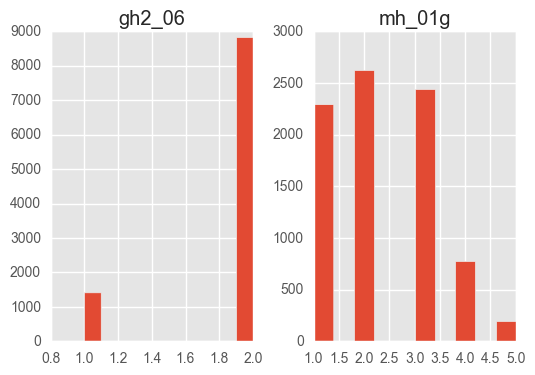

In [375]:
df_aps2012_no_nan[['mh_01g', 'gh2_06']].hist()

In [376]:
## generating cross tabs with absolute values
x_tab = pd.crosstab(df_aps2012_no_nan['mh_01g'], df_aps2012_no_nan['gh2_06'])

In [377]:
## generating cross tabs with percentages
x_tab = pd.crosstab(df_aps2012_no_nan['mh_01g'], df_aps2012_no_nan['gh2_06'], normalize = 'index')

In [378]:
x_tab

gh2_06,1.0,2.0
mh_01g,,
1.0,0.077865,0.922135
2.0,0.116323,0.883677
3.0,0.184850,0.815150
4.0,0.313066,0.686934
5.0,0.442211,0.557789


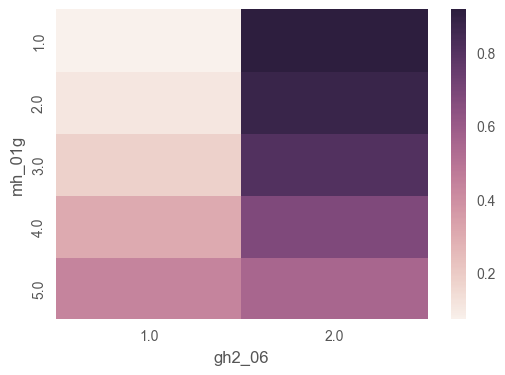

In [379]:

sns.heatmap(x_tab)

In [380]:
df_new = df_aps2012f
df_new = df_new[ df_new["gh2_06"] < 6 ]
df_new = df_new[ df_new["mh_01g"] < 6 ]

from scipy.stats.stats import pearsonr

print(pearsonr(df_new['mh_01g'], df_new['gh2_06']))

(-0.21683681023326873, 2.3794888319573355e-89)


## Health Derived Variables and Mental Health

### Body Mass Index - Intl Standard

#### ('dbmistdg')

1 - Underweight

2 - Normal weight

3 - Overweight

4 - Obese class I

5 - Obese class II

6 - Obese class III

In [381]:
df_aps2012_no_nan["dbmistdg"][ df_aps2012_no_nan["dbmistdg"] >= 6 ] = np.nan

In [382]:
df_aps2012_no_nan['dbmistdg'].value_counts()

2.0    2852
3.0    2056
4.0    1187
5.0     478
1.0     203
Name: dbmistdg, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000028F52231F98>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000028F52436860>]], dtype=object)

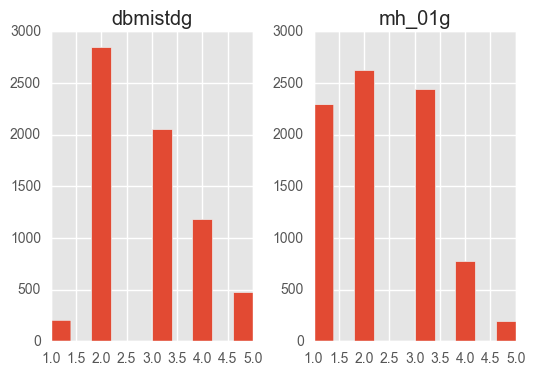

In [383]:
df_aps2012_no_nan[['mh_01g', 'dbmistdg']].hist()

In [384]:
## generating cross tabs with absolute values
x_tab = pd.crosstab(df_aps2012_no_nan['mh_01g'], df_aps2012_no_nan['dbmistdg'])

In [385]:
## generating cross tabs with percentages
x_tab = pd.crosstab(df_aps2012_no_nan['mh_01g'], df_aps2012_no_nan['dbmistdg'], normalize = 'index')

In [386]:
x_tab

dbmistdg,1.0,2.0,3.0,4.0,5.0
mh_01g,,,,,
1.0,0.023477,0.452208,0.314701,0.161543,0.048072
2.0,0.031175,0.398082,0.319424,0.178417,0.072902
3.0,0.031402,0.427721,0.286952,0.180292,0.073633
4.0,0.021739,0.351171,0.309365,0.200669,0.117057
5.0,0.049383,0.382716,0.259259,0.179012,0.129630


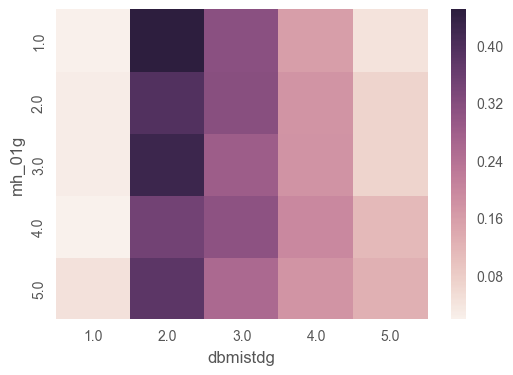

In [387]:
sns.heatmap(x_tab)

In [388]:
df_new = df_aps2012f
df_new = df_new[ df_new["dbmistdg"] < 6 ]
df_new = df_new[ df_new["mh_01g"] < 6 ]

from scipy.stats.stats import pearsonr

print(pearsonr(df_new['mh_01g'], df_new['dbmistdg']))

(0.064185551834283733, 2.2053094571754243e-07)


### Consulted a Health Professional - Last 12 Months

#### ('dconsult')

1 - Consulted a health professional at least once a year

2 - Did not consult a health professional last year

In [389]:
df_aps2012_no_nan["dconsult"][ df_aps2012_no_nan["dconsult"] >= 6 ] = np.nan

In [390]:
df_aps2012_no_nan['dconsult'].value_counts()

1.0    8775
2.0    1464
Name: dconsult, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000028F52578F98>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000028F525F0240>]], dtype=object)

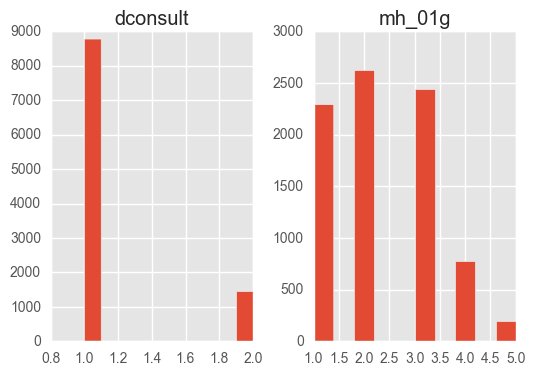

In [391]:
df_aps2012_no_nan[['mh_01g', 'dconsult']].hist()

In [392]:
x_tab

dbmistdg,1.0,2.0,3.0,4.0,5.0
mh_01g,,,,,
1.0,0.023477,0.452208,0.314701,0.161543,0.048072
2.0,0.031175,0.398082,0.319424,0.178417,0.072902
3.0,0.031402,0.427721,0.286952,0.180292,0.073633
4.0,0.021739,0.351171,0.309365,0.200669,0.117057
5.0,0.049383,0.382716,0.259259,0.179012,0.129630


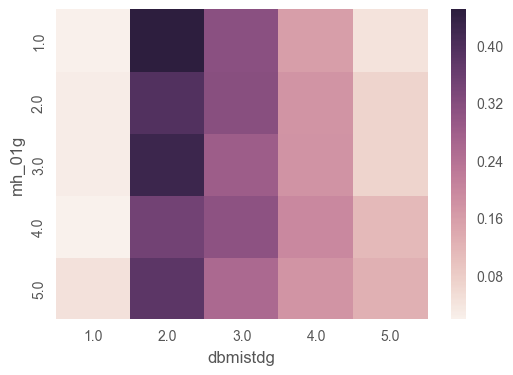

In [393]:
sns.heatmap(x_tab)

In [394]:
df_new = df_aps2012f
df_new = df_new[ df_new["dconsult"] < 6 ]
df_new = df_new[ df_new["mh_01g"] < 6 ]

from scipy.stats.stats import pearsonr

print(pearsonr(df_new['mh_01g'], df_new['dconsult']))

(-0.072494368371321644, 3.2640866957134492e-11)


### Type of drinker

#### ('ddrktype')

1 - Regular drinker (once a month or more)

2 - Occasional drinker (less than once a month)

3 - Non-drinker

In [397]:
df_aps2012_no_nan["ddrktype"][ df_aps2012_no_nan["ddrktype"] >= 6 ] = np.nan

In [398]:
df_aps2012_no_nan['ddrktype'].value_counts()

1.0    4333
3.0    3432
2.0    2412
Name: ddrktype, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000028F5255AE48>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000028F528CE0F0>]], dtype=object)

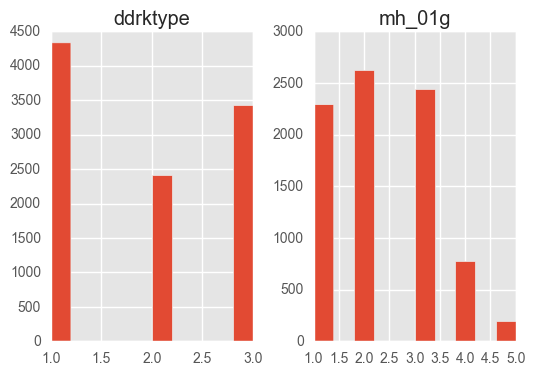

In [399]:
df_aps2012_no_nan[['mh_01g', 'ddrktype']].hist()

In [400]:
## generating cross tabs with absolute values
x_tab = pd.crosstab(df_aps2012_no_nan['mh_01g'], df_aps2012_no_nan['ddrktype'])

In [401]:
## generating cross tabs with percentages
x_tab = pd.crosstab(df_aps2012_no_nan['mh_01g'], df_aps2012_no_nan['ddrktype'], normalize = 'index')

In [402]:
x_tab

ddrktype,1.0,2.0,3.0
mh_01g,,,
1.0,0.497807,0.247368,0.254825
2.0,0.508203,0.264403,0.227394
3.0,0.502469,0.241564,0.255967
4.0,0.444733,0.282185,0.273082
5.0,0.355000,0.310000,0.335000


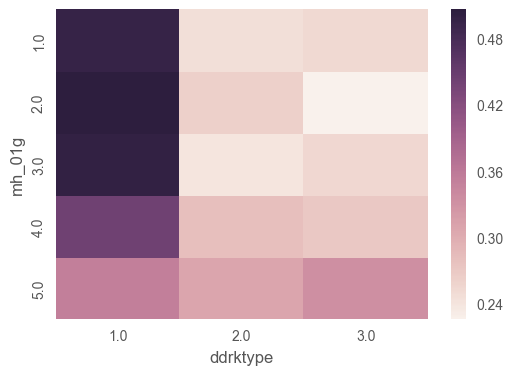

In [403]:
sns.heatmap(x_tab)

In [404]:
df_new = df_aps2012f
df_new = df_new[ df_new["ddrktype"] < 6 ]
df_new = df_new[ df_new["mh_01g"] < 6 ]

from scipy.stats.stats import pearsonr

print(pearsonr(df_new['mh_01g'], df_new['ddrktype']))

(0.03405846529410389, 0.0018730384466133752)


### Drugs - Ever used

#### ('ddrugusg')

1 - Yes

2 - No

In [405]:
df_aps2012_no_nan["ddrugusg"][ df_aps2012_no_nan["ddrugusg"] >= 6 ] = np.nan

In [406]:
df_aps2012_no_nan['ddrugusg'].value_counts()

1.0    5044
2.0    3288
Name: ddrugusg, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000028F52A0E358>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000028F52A7B320>]], dtype=object)

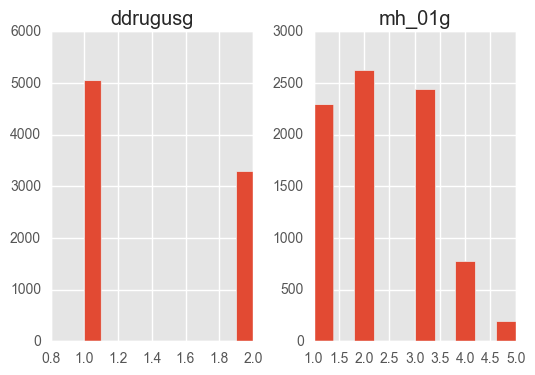

In [407]:
df_aps2012_no_nan[['mh_01g', 'ddrugusg']].hist()

In [408]:
## generating cross tabs with absolute values
x_tab = pd.crosstab(df_aps2012_no_nan['mh_01g'], df_aps2012_no_nan['ddrugusg'])

In [409]:
## generating cross tabs with percentages
x_tab = pd.crosstab(df_aps2012_no_nan['mh_01g'], df_aps2012_no_nan['ddrugusg'], normalize = 'index')

In [410]:
x_tab

ddrugusg,1.0,2.0
mh_01g,,
1.0,0.529618,0.470382
2.0,0.591221,0.408779
3.0,0.647349,0.352651
4.0,0.723017,0.276983
5.0,0.730000,0.270000


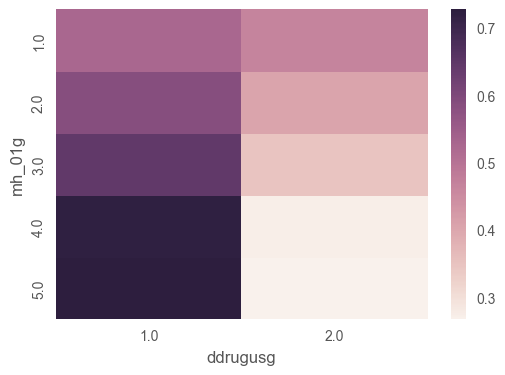

In [411]:
sns.heatmap(x_tab)

In [412]:
df_new = df_aps2012f
df_new = df_new[ df_new["ddrugusg"] < 6 ]
df_new = df_new[ df_new["mh_01g"] < 6 ]

from scipy.stats.stats import pearsonr

print(pearsonr(df_new['mh_01g'], df_new['ddrugusg']))

(-0.12644218796119469, 4.6750859652475063e-31)


### Level of food security in household

#### ('dfoodsec')

1 - high or marginal 

2 - low 

3 - very low

In [413]:
df_aps2012_no_nan["dfoodsec"][ df_aps2012_no_nan["dfoodsec"] >= 6 ] = np.nan

In [414]:
df_aps2012_no_nan['dfoodsec'].value_counts()

1.0    7988
2.0    1165
3.0     958
Name: dfoodsec, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000028F52A4AD30>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000028F52C86630>]], dtype=object)

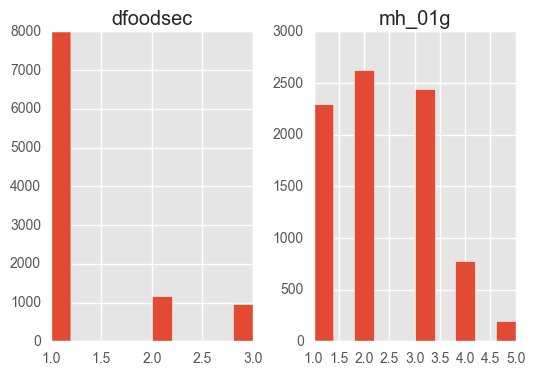

In [415]:
df_aps2012_no_nan[['mh_01g', 'dfoodsec']].hist()

In [416]:
## generating cross tabs with absolute values
x_tab = pd.crosstab(df_aps2012_no_nan['mh_01g'], df_aps2012_no_nan['dfoodsec'])

In [417]:
## generating cross tabs with percentages
x_tab = pd.crosstab(df_aps2012_no_nan['mh_01g'], df_aps2012_no_nan['dfoodsec'], normalize = 'index')

In [418]:
x_tab

dfoodsec,1.0,2.0,3.0
mh_01g,,,
1.0,0.891237,0.070454,0.038309
2.0,0.839416,0.096811,0.063773
3.0,0.703642,0.164504,0.131854
4.0,0.603426,0.172596,0.223979
5.0,0.476923,0.205128,0.317949


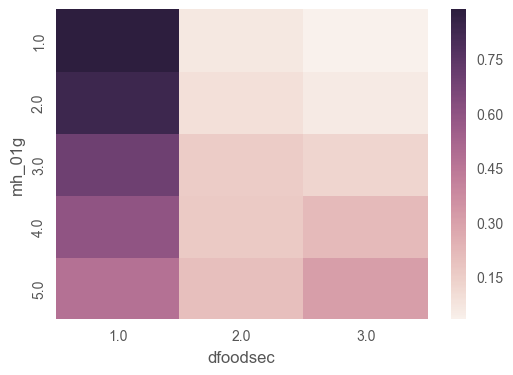

In [419]:
sns.heatmap(x_tab)

In [420]:
df_new = df_aps2012f
df_new = df_new[ df_new["dfoodsec"] < 6 ]
df_new = df_new[ df_new["mh_01g"] < 6 ]

from scipy.stats.stats import pearsonr

print(pearsonr(df_new['mh_01g'], df_new['dfoodsec']))

(0.26247904863565052, 4.3942177694948425e-130)


### Distress Level

#### ('distgk10')

0 to 30 - with 0 being the lowest distress level and 30 being the highest

In [421]:
df_aps2012_no_nan["distgk10"][ df_aps2012_no_nan["distgk10"] >= 6 ] = np.nan

In [422]:
df_aps2012_no_nan['distgk10'].value_counts()

0.0    1233
2.0     867
1.0     729
4.0     684
3.0     658
5.0     457
Name: distgk10, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000028F52DBC9E8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000028F52E33FD0>]], dtype=object)

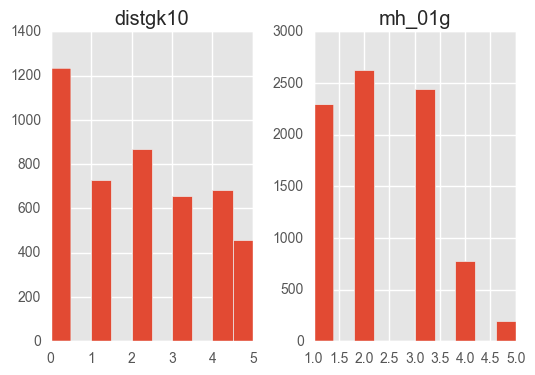

In [423]:
df_aps2012_no_nan[['mh_01g', 'distgk10']].hist()

In [424]:
## generating cross tabs with absolute values
x_tab = pd.crosstab(df_aps2012_no_nan['mh_01g'], df_aps2012_no_nan['distgk10'])

In [425]:
## generating cross tabs with percentages
x_tab = pd.crosstab(df_aps2012_no_nan['mh_01g'], df_aps2012_no_nan['distgk10'], normalize = 'index')

In [426]:
x_tab

distgk10,0.0,1.0,2.0,3.0,4.0,5.0
mh_01g,,,,,,
1.0,0.366152,0.169239,0.174029,0.126131,0.108036,0.056413
2.0,0.208831,0.170644,0.196897,0.158115,0.156325,0.109189
3.0,0.187436,0.120494,0.199794,0.139032,0.204943,0.148301
4.0,0.088889,0.077778,0.155556,0.211111,0.222222,0.244444
5.0,0.400000,0.200000,0.000000,0.200000,0.000000,0.200000


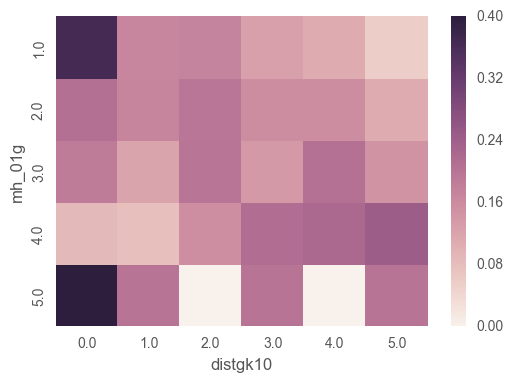

In [427]:
sns.heatmap(x_tab)

In [428]:
df_new = df_aps2012f
df_new = df_new[ df_new["distgk10"] < 6 ]
df_new = df_new[ df_new["mh_01g"] < 6 ]

from scipy.stats.stats import pearsonr

print(pearsonr(df_new['mh_01g'], df_new['distgk10']))

(0.22601732414478895, 1.0166186692621511e-54)


### Considered Committing Suicide

#### ('dsuicg')


1 - never considered

2 - Considered, but not in last 12 months

3 - Considered in the last 12 months

In [429]:
df_aps2012_no_nan["dsuicg"][ df_aps2012_no_nan["dsuicg"] >= 6 ] = np.nan

In [430]:
df_aps2012_no_nan['dsuicg'].value_counts()

1.0    6575
2.0    1289
3.0     454
Name: dsuicg, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000028F530FFC88>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000028F5316E630>]], dtype=object)

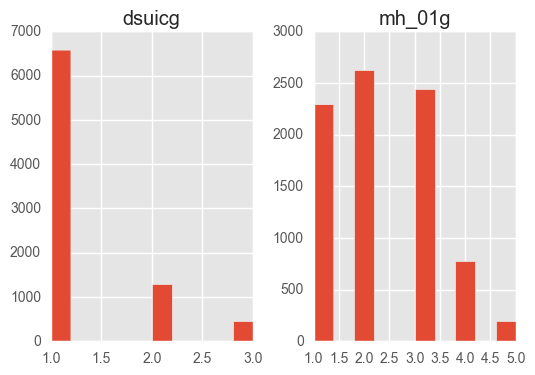

In [431]:
df_aps2012_no_nan[['mh_01g', 'dsuicg']].hist()

In [432]:
## generating cross tabs with absolute values
x_tab = pd.crosstab(df_aps2012_no_nan['mh_01g'], df_aps2012_no_nan['dsuicg'])

In [433]:
## generating cross tabs with percentages
x_tab = pd.crosstab(df_aps2012_no_nan['mh_01g'], df_aps2012_no_nan['dsuicg'], normalize = 'index')

In [434]:
x_tab

dsuicg,1.0,2.0,3.0
mh_01g,,,
1.0,0.915753,0.074594,0.009653
2.0,0.835684,0.143347,0.020968
3.0,0.730833,0.199093,0.070074
4.0,0.550327,0.288889,0.160784
5.0,0.417085,0.175879,0.407035


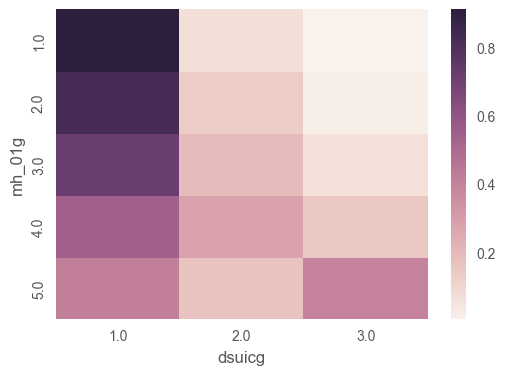

In [435]:
sns.heatmap(x_tab)

In [436]:
df_new = df_aps2012f
df_new = df_new[ df_new["dsuicg"] < 6 ]
df_new = df_new[ df_new["mh_01g"] < 6 ]

from scipy.stats.stats import pearsonr

print(pearsonr(df_new['mh_01g'], df_new['dsuicg']))

(0.32371402955104767, 2.1934696678821314e-202)


## Community Support and Mental Health

### Person to Turn to for support

#### ('dcommsup')

1 - No one

2 - Family only

3 - Non-relative only

4 - Both family and non-relative

In [437]:
df_aps2012_no_nan["dcommsup"][ df_aps2012_no_nan["dcommsup"] >= 6 ] = np.nan

In [438]:
df_aps2012_no_nan['dcommsup'].value_counts()

2.0    7048
4.0    2179
3.0     702
1.0     247
Name: dcommsup, dtype: int64

In [439]:
## generating cross tabs with absolute values
x_tab = pd.crosstab(df_aps2012_no_nan['mh_01g'], df_aps2012_no_nan['dcommsup'])

In [440]:
## generating cross tabs with percentages
x_tab = pd.crosstab(df_aps2012_no_nan['mh_01g'], df_aps2012_no_nan['dcommsup'], normalize = 'all')

In [441]:
x_tab

dcommsup,1.0,2.0,3.0,4.0
mh_01g,,,,
1.0,0.006048,0.193662,0.013911,0.060965
2.0,0.005201,0.220515,0.021652,0.068828
3.0,0.010887,0.197653,0.025523,0.058304
4.0,0.004113,0.060360,0.011491,0.016935
5.0,0.001814,0.013669,0.004113,0.004355


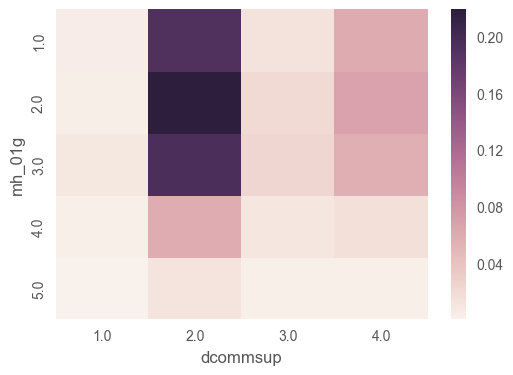

In [442]:
sns.heatmap(x_tab)

In [443]:
df_new = df_aps2012f
df_new = df_new[ df_new["dcommsup"] < 6 ]
df_new = df_new[ df_new["mh_01g"] < 6 ]

from scipy.stats.stats import pearsonr

print(pearsonr(df_new['mh_01g'], df_new['dcommsup']))

(-0.011304415545560206, 0.30306485987196141)


## Labour derived variables

### Employment Status - Reference Week

#### ('dempstat')

1 - Employed

2 - Unemployed

In [444]:
df_aps2012_no_nan["dempstat"][ df_aps2012_no_nan["dempstat"] >= 6 ] = np.nan

In [445]:
df_aps2012_no_nan['dempstat'].value_counts()

1.0    5126
2.0    4099
Name: dempstat, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000028F53D97710>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000028F53E10208>]], dtype=object)

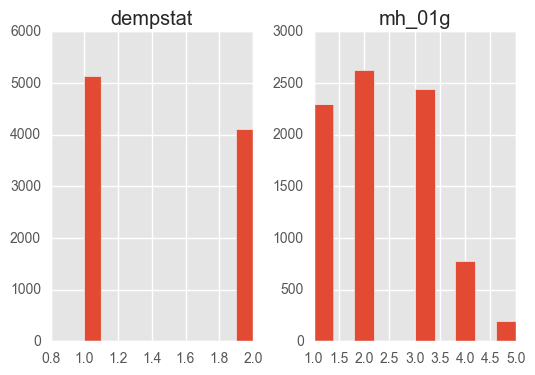

In [446]:
df_aps2012_no_nan[['mh_01g', 'dempstat']].hist()

In [447]:
## generating cross tabs with absolute values
x_tab = pd.crosstab(df_aps2012_no_nan['mh_01g'], df_aps2012_no_nan['dempstat'])

In [448]:
## generating cross tabs with percentages
x_tab = pd.crosstab(df_aps2012_no_nan['mh_01g'], df_aps2012_no_nan['dempstat'], normalize = 'index')

In [449]:
x_tab

dempstat,1.0,2.0
mh_01g,,
1.0,0.627185,0.372815
2.0,0.638371,0.361629
3.0,0.536066,0.463934
4.0,0.413212,0.586788
5.0,0.290000,0.710000


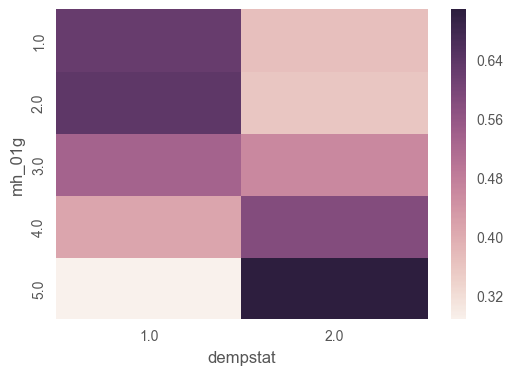

In [450]:
sns.heatmap(x_tab)

In [451]:
df_new = df_aps2012f
df_new = df_new[ df_new["dempstat"] < 6 ]
df_new = df_new[ df_new["mh_01g"] < 6 ]

from scipy.stats.stats import pearsonr

print(pearsonr(df_new['mh_01g'], df_new['dempstat']))

(0.15144641629696698, 4.3305030984252888e-44)


### Labour Force Status

#### ('dlfstat')

1 - Employed

2 - Unemployed

3 - Not in labour force

In [452]:
df_aps2012_no_nan["dlfstat"][ df_aps2012_no_nan["dlfstat"] >= 6 ] = np.nan

In [453]:
df_aps2012_no_nan['dlfstat'].value_counts()

1.0    5126
3.0    3337
2.0     741
Name: dlfstat, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000028F53DD1908>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000028F53FBE6A0>]], dtype=object)

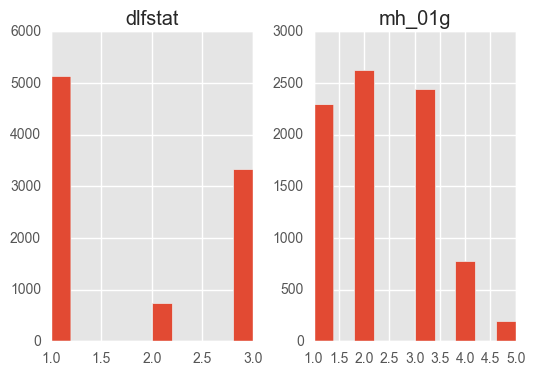

In [454]:
df_aps2012_no_nan[['mh_01g', 'dlfstat']].hist()

In [455]:
## generating cross tabs with absolute values
x_tab = pd.crosstab(df_aps2012_no_nan['mh_01g'], df_aps2012_no_nan['dlfstat'])

In [456]:
## generating cross tabs with percentages
x_tab = pd.crosstab(df_aps2012_no_nan['mh_01g'], df_aps2012_no_nan['dlfstat'], normalize = 'index')

In [457]:
x_tab

dlfstat,1.0,2.0,3.0
mh_01g,,,
1.0,0.627734,0.068679,0.303587
2.0,0.639832,0.064098,0.296070
3.0,0.536946,0.091133,0.371921
4.0,0.414824,0.101430,0.483745
5.0,0.290000,0.095000,0.615000


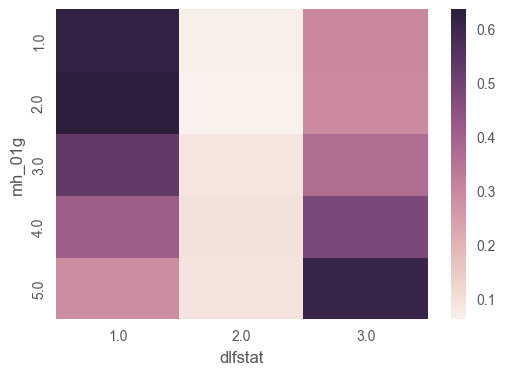

In [458]:

sns.heatmap(x_tab)

In [459]:
df_new = df_aps2012f
df_new = df_new[ df_new["dlfstat"] < 6 ]
df_new = df_new[ df_new["mh_01g"] < 6 ]

from scipy.stats.stats import pearsonr

print(pearsonr(df_new['mh_01g'], df_new['dlfstat']))

(0.14731685794314359, 1.0259123421474723e-41)


### Work or occupational category

#### ('docc11g')

1 - Management

2 - Business/Finance

3 - Natural/Applied Sciences

4 - Health

5 - Education, Law, Social Services

6 - Arts & Culture, Sport

7 - Sales/Service

8 - Trade/Transport

9 - Natural Resources

10 - Manufacturing and Utilities


In [460]:
df_aps2012_no_nan["docc11g"][ df_aps2012_no_nan["docc11g"] >= 6 ] = np.nan

In [461]:
df_aps2012_no_nan['docc11g'].value_counts()

2.0    1078
5.0    1063
4.0     436
1.0     251
3.0      88
Name: docc11g, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000028F54122FD0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000028F5416B668>]], dtype=object)

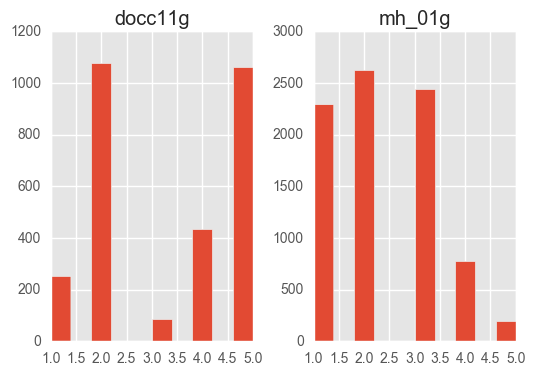

In [462]:
df_aps2012_no_nan[['mh_01g', 'docc11g']].hist()

In [463]:
## generating cross tabs with absolute values
x_tab = pd.crosstab(df_aps2012_no_nan['mh_01g'], df_aps2012_no_nan['docc11g'])

In [464]:
## generating cross tabs with percentages
x_tab = pd.crosstab(df_aps2012_no_nan['mh_01g'], df_aps2012_no_nan['docc11g'], normalize = 'index')

In [465]:
x_tab

docc11g,1.0,2.0,3.0,4.0,5.0
mh_01g,,,,,
1.0,0.101163,0.383721,0.037209,0.150000,0.327907
2.0,0.067127,0.372162,0.033564,0.155972,0.371175
3.0,0.100275,0.359890,0.023352,0.145604,0.370879
4.0,0.100559,0.357542,0.022346,0.139665,0.379888
5.0,0.103448,0.344828,0.034483,0.206897,0.310345


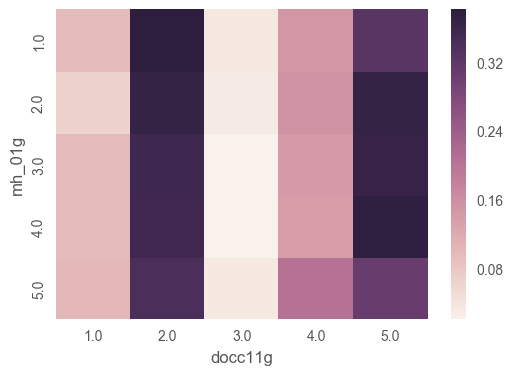

In [466]:
sns.heatmap(x_tab)

In [467]:
df_new = df_aps2012f
df_new = df_new[ df_new["docc11g"] < 6 ]
df_new = df_new[ df_new["mh_01g"] < 6 ]

from scipy.stats.stats import pearsonr

print(pearsonr(df_new['mh_01g'], df_new['docc11g']))

(0.024965096615290627, 0.18528683286809483)


## Injuries and Mental Health
(doesn't indicate whether it's workplace in the guide)

### Injury - Past 12 months

#### ('inj_01')

1 - Yes

2 - No

3 - Don't know

In [468]:
df_aps2012_no_nan["inj_01"][ df_aps2012_no_nan["inj_01"] >= 6 ] = np.nan

In [469]:
df_aps2012_no_nan['inj_01'].value_counts()

2.0    8404
1.0    1856
Name: inj_01, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000028F54141048>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000028F54320A20>]], dtype=object)

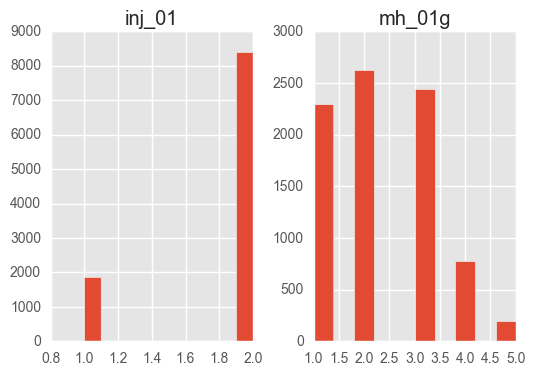

In [470]:
df_aps2012_no_nan[['mh_01g', 'inj_01']].hist()

In [471]:
## generating cross tabs with absolute values
x_tab = pd.crosstab(df_aps2012_no_nan['mh_01g'], df_aps2012_no_nan['inj_01'])

In [472]:
## generating cross tabs with percentages
x_tab = pd.crosstab(df_aps2012_no_nan['mh_01g'], df_aps2012_no_nan['inj_01'], normalize = 'index')

In [473]:
x_tab

inj_01,1.0,2.0
mh_01g,,
1.0,0.155022,0.844978
2.0,0.177008,0.822992
3.0,0.187705,0.812295
4.0,0.245796,0.754204
5.0,0.291457,0.708543


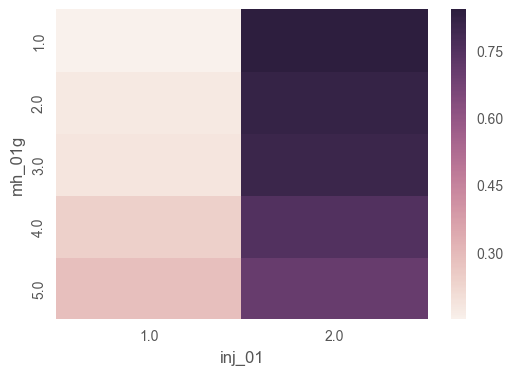

In [474]:
sns.heatmap(x_tab)

In [475]:
df_new = df_aps2012f
df_new = df_new[ df_new["inj_01"] < 6 ]
df_new = df_new[ df_new["mh_01g"] < 6 ]

from scipy.stats.stats import pearsonr

print(pearsonr(df_new['mh_01g'], df_new['inj_01']))

(-0.07223175033254059, 3.7608724290491414e-11)


## Traditional Activities and Mental Health

### Traditional Activities done during the past year

#### ('dtractyr')

1 - Did one or more traditional activities during the past year

2 - Did not do any traditional activities during the past year

In [476]:
df_aps2012_no_nan["dtractyr"][ df_aps2012_no_nan["dtractyr"] >= 6 ] = np.nan

In [477]:
df_aps2012_no_nan['dtractyr'].value_counts()

1.0    6197
2.0    3031
Name: dtractyr, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000028F5436C518>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000028F544D7048>]], dtype=object)

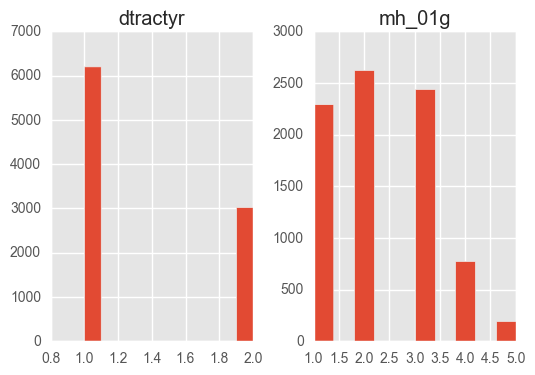

In [478]:
df_aps2012_no_nan[['mh_01g', 'dtractyr']].hist()

In [479]:
## generating cross tabs with absolute values
x_tab = pd.crosstab(df_aps2012_no_nan['mh_01g'], df_aps2012_no_nan['dtractyr'])

In [480]:
## generating cross tabs with percentages
x_tab = pd.crosstab(df_aps2012_no_nan['mh_01g'], df_aps2012_no_nan['dtractyr'], normalize = 'index')

In [481]:
x_tab

dtractyr,1.0,2.0
mh_01g,,
1.0,0.649345,0.350655
2.0,0.679863,0.320137
3.0,0.679639,0.320361
4.0,0.673575,0.326425
5.0,0.693467,0.306533


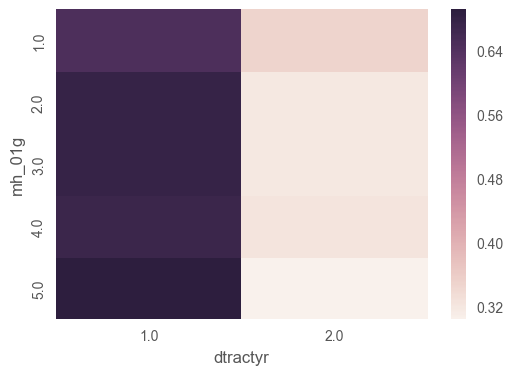

In [482]:
sns.heatmap(x_tab)

In [483]:
df_new = df_aps2012f
df_new = df_new[ df_new["dtractyr"] < 6 ]
df_new = df_new[ df_new["mh_01g"] < 6 ]

from scipy.stats.stats import pearsonr

print(pearsonr(df_new['mh_01g'], df_new['dtractyr']))

(-0.021653830147537963, 0.047671490381501327)


### Traditional Clothing/Footwear made in the last year

#### ('ta_01a')

1 - Yes

2 - No

In [484]:
df_aps2012_no_nan["ta_01a"][ df_aps2012_no_nan["ta_01a"] >= 6 ] = np.nan

In [485]:
df_aps2012_no_nan['ta_01a'].value_counts()

2.0    7602
1.0    1624
Name: ta_01a, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000028F545BD978>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000028F54682CF8>]], dtype=object)

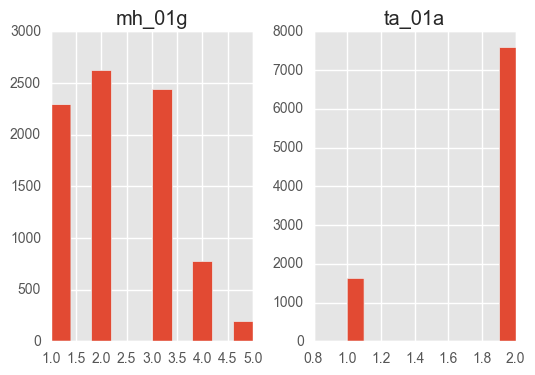

In [486]:
df_aps2012_no_nan[['mh_01g', 'ta_01a']].hist()

In [487]:
## generating cross tabs with absolute values
x_tab = pd.crosstab(df_aps2012_no_nan['mh_01g'], df_aps2012_no_nan['ta_01a'])

In [488]:
## generating cross tabs with percentages
x_tab = pd.crosstab(df_aps2012_no_nan['mh_01g'], df_aps2012_no_nan['ta_01a'], normalize = 'index')

In [489]:
x_tab

ta_01a,1.0,2.0
mh_01g,,
1.0,0.164629,0.835371
2.0,0.162543,0.837457
3.0,0.191315,0.808685
4.0,0.181347,0.818653
5.0,0.211055,0.788945


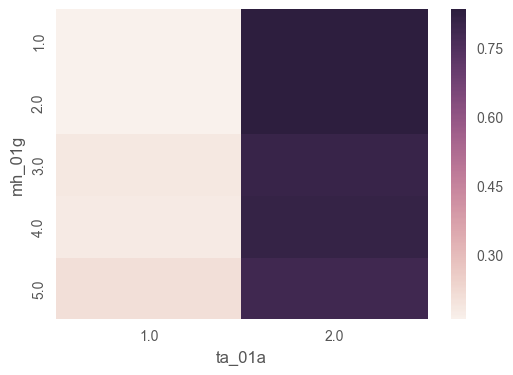

In [490]:
sns.heatmap(x_tab)

In [491]:
df_new = df_aps2012f
df_new = df_new[ df_new["ta_01a"] < 6 ]
df_new = df_new[ df_new["mh_01g"] < 6 ]

from scipy.stats.stats import pearsonr

print(pearsonr(df_new['mh_01g'], df_new['ta_01a']))

(-0.029637642118592201, 0.0067141726057713567)


### Arts/Crafts made in the last year

#### ('ta_02a')

1 - Yes

2 - No

In [492]:
df_aps2012_no_nan["ta_02a"][ df_aps2012_no_nan["ta_02a"] >= 6 ] = np.nan

In [493]:
df_aps2012_no_nan['ta_02a'].value_counts()

2.0    6017
1.0    3209
Name: ta_02a, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000028F547AA9B0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000028F54834BE0>]], dtype=object)

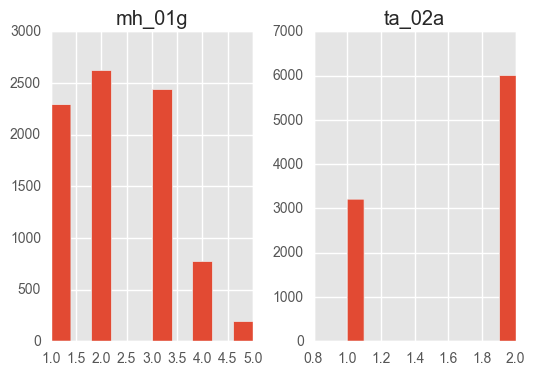

In [494]:
df_aps2012_no_nan[['mh_01g', 'ta_02a']].hist()

In [495]:
## generating cross tabs with absolute values
x_tab = pd.crosstab(df_aps2012_no_nan['mh_01g'], df_aps2012_no_nan['ta_02a'])

In [496]:
## generating cross tabs with percentages
x_tab = pd.crosstab(df_aps2012_no_nan['mh_01g'], df_aps2012_no_nan['ta_02a'], normalize = 'index')

In [497]:
x_tab

ta_02a,1.0,2.0
mh_01g,,
1.0,0.310480,0.689520
2.0,0.354016,0.645984
3.0,0.333333,0.666667
4.0,0.375648,0.624352
5.0,0.415000,0.585000


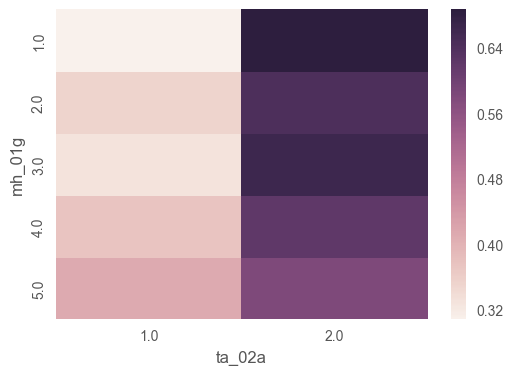

In [498]:
sns.heatmap(x_tab)

In [499]:
df_new = df_aps2012f
df_new = df_new[ df_new["ta_02a"] < 6 ]
df_new = df_new[ df_new["mh_01g"] < 6 ]

from scipy.stats.stats import pearsonr

print(pearsonr(df_new['mh_01g'], df_new['ta_02a']))

(-0.036392583961242266, 0.0008725655790824588)


### Hunting/Fishing/Trapping in the last year

#### ('ta_03a')

1 - Yes

2 - No

In [500]:
df_aps2012_no_nan["ta_03a"][ df_aps2012_no_nan["ta_03a"] >= 6 ] = np.nan

In [501]:
df_aps2012_no_nan['ta_03a'].value_counts()

2.0    6194
1.0    3032
Name: ta_03a, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000028F54809518>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000028F549E6898>]], dtype=object)

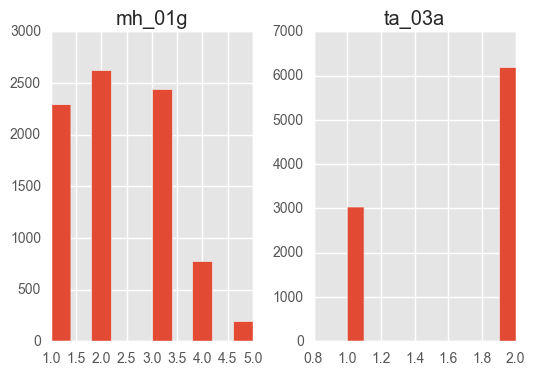

In [502]:
df_aps2012_no_nan[['mh_01g', 'ta_03a']].hist()

In [503]:
## generating cross tabs with absolute values
x_tab = pd.crosstab(df_aps2012_no_nan['mh_01g'], df_aps2012_no_nan['ta_03a'])

In [504]:
## generating cross tabs with percentages
x_tab = pd.crosstab(df_aps2012_no_nan['mh_01g'], df_aps2012_no_nan['ta_03a'], normalize = 'index')

In [505]:
x_tab

ta_03a,1.0,2.0
mh_01g,,
1.0,0.330131,0.669869
2.0,0.338919,0.661081
3.0,0.348075,0.651925
4.0,0.288860,0.711140
5.0,0.250000,0.750000


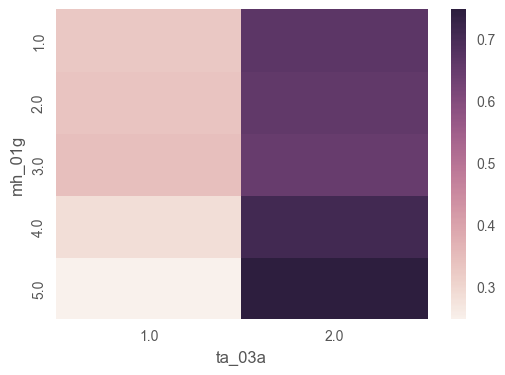

In [506]:
sns.heatmap(x_tab)

In [507]:
df_new = df_aps2012f
df_new = df_new[ df_new["ta_03a"] < 6 ]
df_new = df_new[ df_new["mh_01g"] < 6 ]

from scipy.stats.stats import pearsonr

print(pearsonr(df_new['mh_01g'], df_new['ta_03a']))

(0.017655196687539624, 0.10638967154352574)


### Wild Plants - gathered in the last year

#### ('ta_04a')

1 - Yes

2 - No

In [508]:
df_aps2012_no_nan["ta_04a"][ df_aps2012_no_nan["ta_04a"] >= 6 ] = np.nan

In [509]:
df_aps2012_no_nan['ta_04a'].value_counts()

2.0    6037
1.0    3184
Name: ta_04a, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000028F54A568D0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000028F54B98550>]], dtype=object)

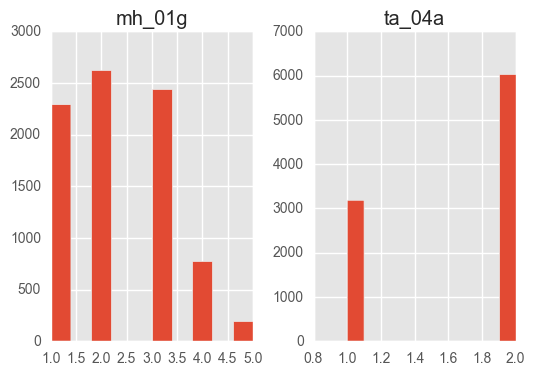

In [510]:
df_aps2012_no_nan[['mh_01g', 'ta_04a']].hist()

In [511]:
## generating cross tabs with absolute values
x_tab = pd.crosstab(df_aps2012_no_nan['mh_01g'], df_aps2012_no_nan['ta_04a'])

In [512]:
## generating cross tabs with percentages
x_tab = pd.crosstab(df_aps2012_no_nan['mh_01g'], df_aps2012_no_nan['ta_04a'], normalize = 'index')

In [513]:
x_tab

ta_04a,1.0,2.0
mh_01g,,
1.0,0.327074,0.672926
2.0,0.359238,0.640762
3.0,0.365724,0.634276
4.0,0.354922,0.645078
5.0,0.400000,0.600000


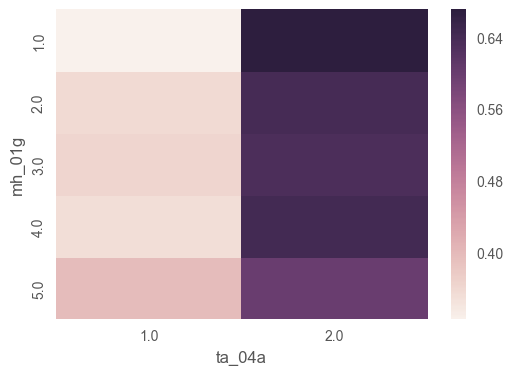

In [514]:
sns.heatmap(x_tab)

In [515]:
df_new = df_aps2012f
df_new = df_new[ df_new["ta_04a"] < 6 ]
df_new = df_new[ df_new["mh_01g"] < 6 ]

from scipy.stats.stats import pearsonr

print(pearsonr(df_new['mh_01g'], df_new['ta_04a']))

(-0.029117624631085668, 0.0077530662414672944)


## Education and Mental Health

### Highest grade completed

#### ('dhighgrg')

1 - No schooling/Homeschooled

2 - KG or 1-6

3 - Gr. 7

4 - Gr. 8

5 - Gr. 9

6 - Gr. 10

7 - Gr. 11-13

8 - High school completed

In [516]:
df_aps2012_no_nan["dhighgrg"][ df_aps2012_no_nan["dhighgrg"] >= 6 ] = np.nan

In [517]:
df_aps2012_no_nan['dhighgrg'].value_counts()

5.0    521
4.0    340
2.0    238
3.0    232
1.0     70
Name: dhighgrg, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000028F54C56400>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000028F54D44AC8>]], dtype=object)

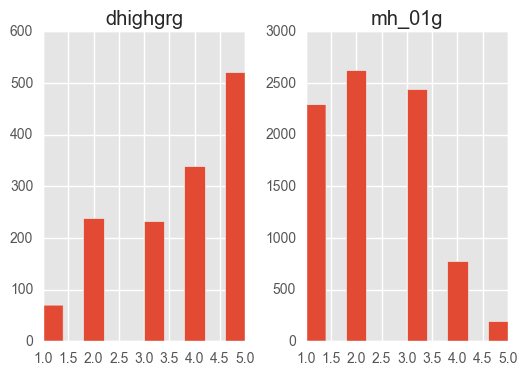

In [518]:
df_aps2012_no_nan[['mh_01g', 'dhighgrg']].hist()

In [519]:
## generating cross tabs with absolute values
x_tab = pd.crosstab(df_aps2012_no_nan['mh_01g'], df_aps2012_no_nan['dhighgrg'])

In [520]:
## generating cross tabs with percentages
x_tab = pd.crosstab(df_aps2012_no_nan['mh_01g'], df_aps2012_no_nan['dhighgrg'], normalize = 'index')

In [521]:
x_tab

dhighgrg,1.0,2.0,3.0,4.0,5.0
mh_01g,,,,,
1.0,0.046083,0.142857,0.138249,0.253456,0.419355
2.0,0.031546,0.126183,0.170347,0.246057,0.425868
3.0,0.043033,0.157787,0.190574,0.256148,0.352459
4.0,0.037037,0.203704,0.129630,0.253086,0.376543
5.0,0.038462,0.173077,0.115385,0.192308,0.480769


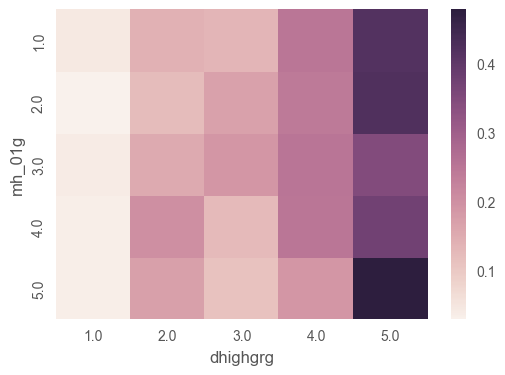

In [522]:
sns.heatmap(x_tab)

In [523]:
df_new = df_aps2012f
df_new = df_new[ df_new["dhighgrg"] < 6 ]
df_new = df_new[ df_new["mh_01g"] < 6 ]

from scipy.stats.stats import pearsonr

print(pearsonr(df_new['mh_01g'], df_new['dhighgrg']))

(-0.035769208137109702, 0.2055860779242677)


### High school diploma completed

#### ('dhsdip')

1 - Yes

2 - No

In [524]:
df_aps2012_no_nan["dhsdip"][ df_aps2012_no_nan["dhsdip"] >= 6 ] = np.nan

In [525]:
df_aps2012_no_nan['dhsdip'].value_counts()

1.0    4206
2.0    1199
Name: dhsdip, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000028F54E8CDD8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000028F54EF8F28>]], dtype=object)

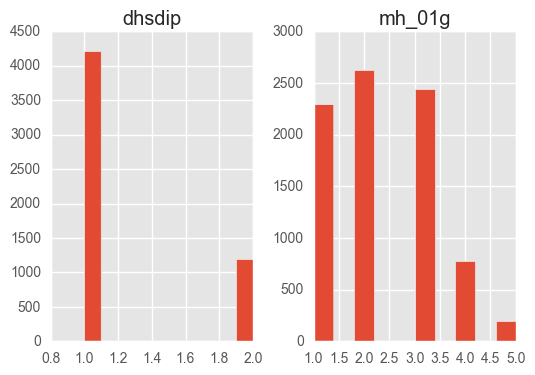

In [526]:
df_aps2012_no_nan[['mh_01g', 'dhsdip']].hist()

In [527]:
## generating cross tabs with absolute values
x_tab = pd.crosstab(df_aps2012_no_nan['mh_01g'], df_aps2012_no_nan['dhsdip'])

In [528]:
## generating cross tabs with percentages
x_tab = pd.crosstab(df_aps2012_no_nan['mh_01g'], df_aps2012_no_nan['dhsdip'], normalize = 'index')

In [529]:
x_tab

dhsdip,1.0,2.0
mh_01g,,
1.0,0.831970,0.168030
2.0,0.802849,0.197151
3.0,0.716307,0.283693
4.0,0.691358,0.308642
5.0,0.747253,0.252747


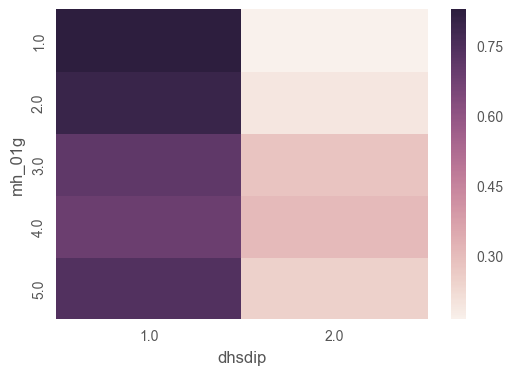

In [530]:
sns.heatmap(x_tab)

In [531]:
df_new = df_aps2012f
df_new = df_new[ df_new["dhsdip"] < 6 ]
df_new = df_new[ df_new["mh_01g"] < 6 ]

from scipy.stats.stats import pearsonr

print(pearsonr(df_new['mh_01g'], df_new['dhsdip']))

(0.11545379033861779, 7.0251686989031816e-17)


### Highest level of education attained

#### ('dhlosgg')

1 - Gr. 8 or Lower

2 - Some secondary

3 - Secondary or equivalent

4 - Some postsecondary

5 - Postsecondary certificate or diploma

6 - Bachelor's degree or above

In [532]:
df_aps2012_no_nan["dhlosgg"][ df_aps2012_no_nan["dhlosgg"] >= 6 ] = np.nan

In [533]:
df_aps2012_no_nan['dhlosgg'].value_counts()

5.0    2364
2.0    1540
4.0    1266
3.0    1187
1.0     710
Name: dhlosgg, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000028F54ECC860>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000028F550B15C0>]], dtype=object)

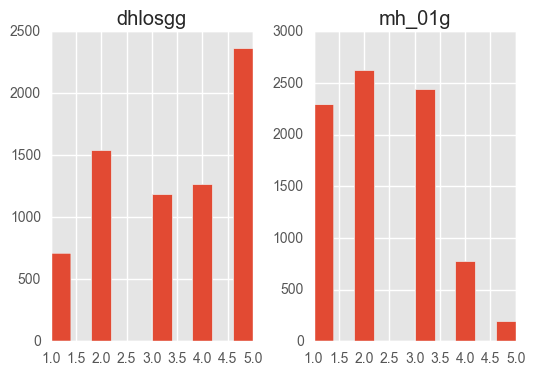

In [534]:
df_aps2012_no_nan[['mh_01g', 'dhlosgg']].hist()

In [535]:
## generating cross tabs with absolute values
x_tab = pd.crosstab(df_aps2012_no_nan['mh_01g'], df_aps2012_no_nan['dhlosgg'])

In [536]:
## generating cross tabs with percentages
x_tab = pd.crosstab(df_aps2012_no_nan['mh_01g'], df_aps2012_no_nan['dhlosgg'], normalize = 'index')

In [537]:
x_tab

dhlosgg,1.0,2.0,3.0,4.0,5.0
mh_01g,,,,,
1.0,0.053977,0.163636,0.188068,0.185795,0.408523
2.0,0.070218,0.196610,0.188862,0.166102,0.378208
3.0,0.123451,0.259792,0.144769,0.187407,0.284581
4.0,0.124611,0.264798,0.149533,0.161994,0.299065
5.0,0.125683,0.289617,0.103825,0.213115,0.267760


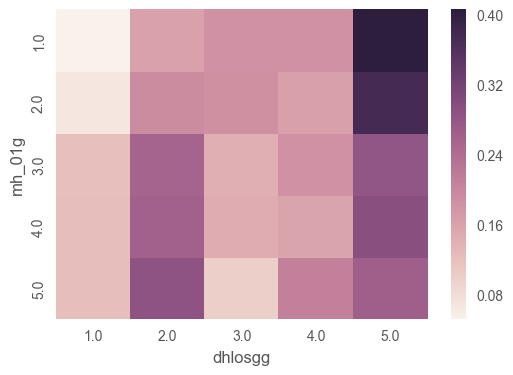

In [538]:
sns.heatmap(x_tab)

In [539]:
df_new = df_aps2012f
df_new = df_new[ df_new["dhlosgg"] < 6 ]
df_new = df_new[ df_new["mh_01g"] < 6 ]

from scipy.stats.stats import pearsonr

print(pearsonr(df_new['mh_01g'], df_new['dhlosgg']))

(-0.1408934704701883, 4.7228927127559166e-31)


## Mental Health and Housing

### Dwelling - Owned/rented

#### ('hou_01')

1 - Owned by member of hhld

2 - Rented, even if no cash is paid

In [540]:
df_aps2012_no_nan["hou_01"][ df_aps2012_no_nan["hou_01"] >= 6 ] = np.nan

In [541]:
df_aps2012_no_nan['hou_01'].value_counts()

1.0    5831
2.0    4362
Name: hou_01, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000028F54F086D8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000028F552667B8>]], dtype=object)

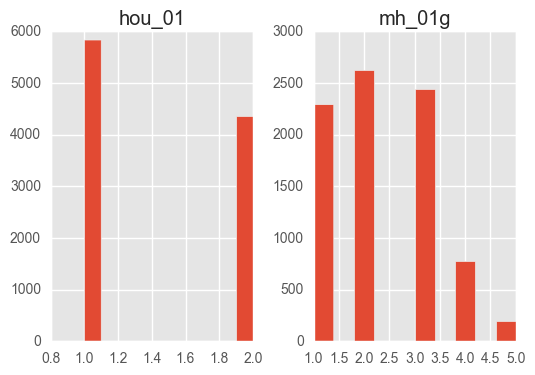

In [542]:
df_aps2012_no_nan[['mh_01g', 'hou_01']].hist()

In [543]:
## generating cross tabs with absolute values
x_tab = pd.crosstab(df_aps2012_no_nan['mh_01g'], df_aps2012_no_nan['hou_01'])

In [544]:
## generating cross tabs with percentages
x_tab = pd.crosstab(df_aps2012_no_nan['mh_01g'], df_aps2012_no_nan['hou_01'], normalize = 'index')

In [545]:
x_tab

hou_01,1.0,2.0
mh_01g,,
1.0,0.639877,0.360123
2.0,0.610623,0.389377
3.0,0.486957,0.513043
4.0,0.428010,0.571990
5.0,0.373737,0.626263


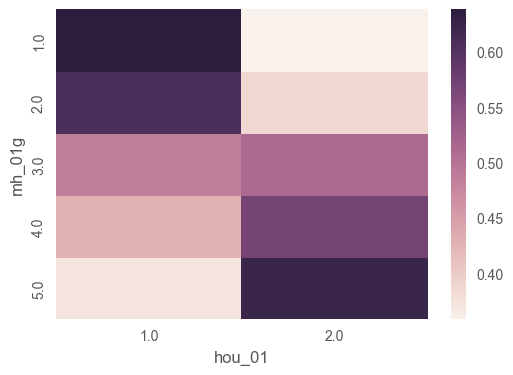

In [546]:
sns.heatmap(x_tab)

In [547]:
df_new = df_aps2012f
df_new = df_new[ df_new["hou_01"] < 6 ]
df_new = df_new[ df_new["mh_01g"] < 6 ]

from scipy.stats.stats import pearsonr

print(pearsonr(df_new['mh_01g'], df_new['hou_01']))

(0.15958163984299428, 1.6885756485331744e-48)


### Dwelling - Needs repairs

#### ('hou_02g')

1 - No only regular maintenance is needed

2 - Yes, minor repairs are needed

3 - Yes, major repairs are needed

In [548]:
df_aps2012_no_nan["hou_02g"][ df_aps2012_no_nan["hou_02g"] >= 6 ] = np.nan

In [549]:
df_aps2012_no_nan['hou_02g'].value_counts()

1.0    6109
2.0    2766
3.0    1294
Name: hou_02g, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000028F5523A358>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000028F55411A20>]], dtype=object)

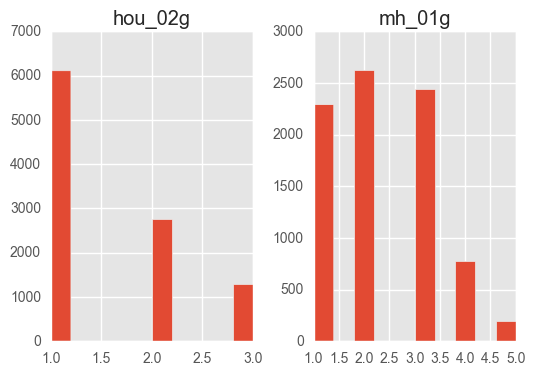

In [550]:
df_aps2012_no_nan[['mh_01g', 'hou_02g']].hist()

In [551]:
## generating cross tabs with absolute values
x_tab = pd.crosstab(df_aps2012_no_nan['mh_01g'], df_aps2012_no_nan['hou_02g'])

In [552]:
## generating cross tabs with percentages
x_tab = pd.crosstab(df_aps2012_no_nan['mh_01g'], df_aps2012_no_nan['hou_02g'], normalize = 'index')

In [553]:
x_tab

hou_02g,1.0,2.0,3.0
mh_01g,,,
1.0,0.693662,0.229313,0.077025
2.0,0.608879,0.275545,0.115576
3.0,0.539069,0.299667,0.161264
4.0,0.467363,0.332898,0.199739
5.0,0.479592,0.260204,0.260204


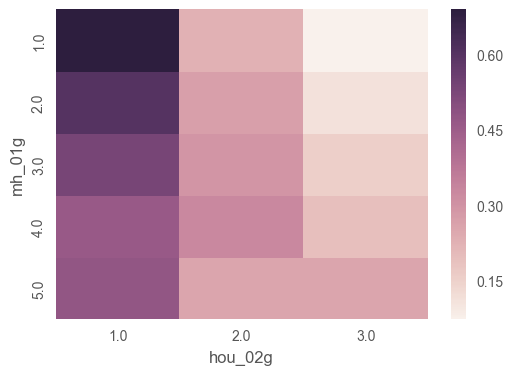

In [554]:
sns.heatmap(x_tab)

In [555]:
df_new = df_aps2012f
df_new = df_new[ df_new["hou_02g"] < 6 ]
df_new = df_new[ df_new["mh_01g"] < 6 ]

from scipy.stats.stats import pearsonr

print(pearsonr(df_new['mh_01g'], df_new['hou_02g']))

(0.16489232780507068, 1.3702437452944991e-51)


### Dwelling - Subsidized

#### ('hou_04')

1 - Yes

2 - No

3 - Don't know

In [556]:
df_aps2012_no_nan["hou_04"][ df_aps2012_no_nan["hou_04"] >= 6 ] = np.nan

In [557]:
df_aps2012_no_nan['hou_04'].value_counts()

2.0    8230
1.0    1733
Name: hou_04, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000028F5A2C6160>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000028F5A33E588>]], dtype=object)

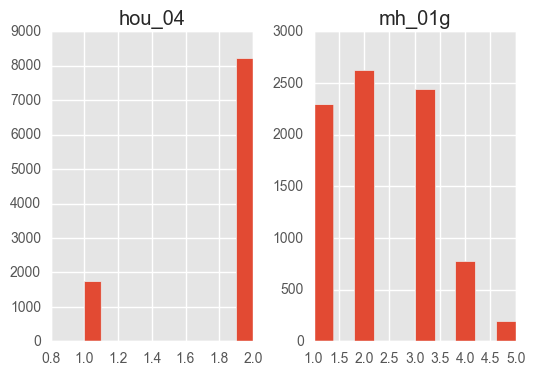

In [558]:
df_aps2012_no_nan[['mh_01g', 'hou_04']].hist()

In [559]:
## generating cross tabs with absolute values
x_tab = pd.crosstab(df_aps2012_no_nan['mh_01g'], df_aps2012_no_nan['hou_04'])

In [560]:
## generating cross tabs with percentages
x_tab = pd.crosstab(df_aps2012_no_nan['mh_01g'], df_aps2012_no_nan['hou_04'], normalize = 'index')

In [561]:
x_tab

hou_04,1.0,2.0
mh_01g,,
1.0,0.120697,0.879303
2.0,0.148422,0.851578
3.0,0.234308,0.765692
4.0,0.230872,0.769128
5.0,0.255208,0.744792


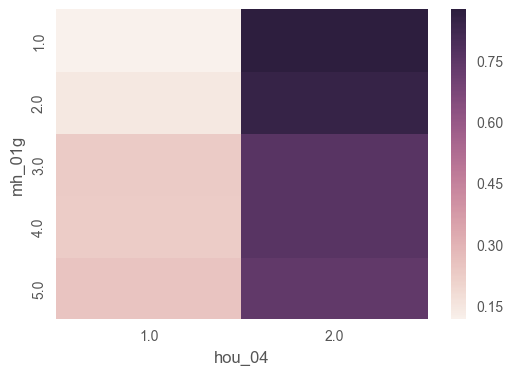

In [562]:
sns.heatmap(x_tab)

In [563]:
df_new = df_aps2012f
df_new = df_new[ df_new["hou_04"] < 6 ]
df_new = df_new[ df_new["mh_01g"] < 6 ]

from scipy.stats.stats import pearsonr

print(pearsonr(df_new['mh_01g'], df_new['hou_04']))

(-0.12334917208608928, 7.8695607259476188e-29)


#### Conclusion

Overall, my findings from this analysis are inconclusive. My previous research in this area told me that mental health and general health self-ratings were correlated.  This analysis confirms that. The research also shows a low correlation between access to healthcare professionals and mental health. This means that access is not an issue, another conclusion from my previous analysis.

Of all the other factors, the only one that showed any indication of a higher correlation than average was that of food security. It makes sense to me that this would be a factor in mental health, but I am puzzled by the fact that there are no other indicators that measure equally.  Mental health is often the result of a multiple of co-existing factors that result in overall well-being or illness.

**Questions about Mental Healthcare**
As with my last analysis, I am leaving this one with more questions than answers. There are the general questions about the type of questions we are asking about mental health care, whether the national population surveys do enough to ask questions pertinent to the issue.  As recognition for the need to treat mental health with equal concern to physical health becomes more prevalent in the public conscience, and the need for adequate service models in our health care institutions gains political clout, it might be relevant for statisticians to start gathering more domain-relevant measurements.

The Mental Health Commission of Canada's 2015 report contains a total of 63 indicators (2015, pg.2) related to mental health assessment, awareness and treatment.  Of those, I only found 5 (anxiety/mood disorders, suicide ideation, community, drinking, and employment status) measured by the APS.

**Questions about Data Sovereignty**
In relation to Aboriginal populations specifically, my questions revolve around their decision to house their data independently with their own governance.  Giving up data to information systems is becoming somewhat synonomous being recognised as actually existing in the world. The price of this inherently unequal transaction between individuals and massive corporations and governments is well-documented.  But no one denies that this is an unescapable trade-off; it often feels like we have no other option.

Except that First Nations communities are proving that there is a choice. But they also bringing to light some of the perils of data sovereignty. As their communities continue to be denied an equal footing in society through entrenched political and socio-economic interests because of their decision to remain sovereign, this is enforced through the way they've chosen to protect their data. 

Some of the questions this raised for me were:

-  What is the reasoning behind the Aboriginal people's decision to house their data independently? While in general terms, I can assume that it's a question of sovereignty, I don't know what the specific rationale was that led up to this decision. I would be interested to learn.


-  What is the history behind this policy? Where can I read more?
Is it wrong to conflate the Aboriginal people's choice to exercise sovereignty over data with their being shutout from access to vital resources and government services? 


-  The Mental Health Commission of Canada published a report in 2015 aimed at "improving mental health data collection" intended to guide government organisations in service allocation. It was the first of its kind in Canada. Aboriginal communities were conspicuously left off.  I'm wondering, what kind of message this sends to Aboriginal peoples and to government officials?


-  Going forward from where we are, how can social scientists, data scientists and policy analysts assist marginalized and sovereign communities to participate in digital spaces while protecting their independence and choices for governance?  Where can I read more  about this challenge?

**Takeaways and Future Exploration**
One extremely useful lesson I hope to carry forward from this exercise is centred around survey question design for data analysis and visualization. I have a better idea now as to what types of answer structures that respond to to which style of analysis and visualization. I'll apply this to my own research in the future. I also plan to take more intro stats and and mathematics courses to shore up my understanding of the logic in my approach.

In terms of python coding, my next step will be to try and turn some of the sections of this code into for loops. I know this might not always work because the answers aren't always coded in the same way, but I'll see what I can accomplish on my own. I also plan to try triangulating mental health with two other related factors instead of just doing one at a time, similar to the way it was done in the study of the Calgary Health Region (Currie et.al., 2013, pg. 54)

From a technical standpoint, I know I have a long way to go in my understanding of data analysis, and I will continue to learn more. But one thing is certain: Though I will continue to learn how to code with Python, I'm not sure the answer to the questions that trouble me most are contained in the data alone.
